In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Getting Started 
Make sure your select ***ros_base*** as your kernel. You can do this by clicking on the kernel dropdown menu and selecting *ros_base*.


## Import Python dependencies

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, cm
from IPython.display import HTML
import numpy as np
import csv

import tqdm as tqdm

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

from ILQR import RefPath
from ILQR import ILQR



In [32]:
def load_path(filepath: str):
    """
    Gets the centerline of the track from the trajectory data. We currently only
    support 2D track.

    Args:
        filepath (str): the path to file consisting of the centerline position.

    Returns:
        np.ndarray: centerline, of the shape (2, N).
    """
    x = []
    y = []
    with open(filepath) as f:
        spamreader = csv.reader(f, delimiter=',')
        for i, row in enumerate(spamreader):
            if i > 0:
                x.append(float(row[0]))
                y.append(float(row[1]))

    return np.array([x, y])

## Generate a reference trajectory

In [33]:
# Define the file paths
config_file = 'task1/task1.yaml'
track_path = 'task1/ref_path.csv'

# Load the reference path
x = []
y = []
left_width = []
right_width = []
with open(track_path, newline='') as f:
    spamreader = csv.reader(f, delimiter=',')
    for i, row in enumerate(spamreader):
        if i>0:
            x.append(float(row[0]))
            y.append(float(row[1]))
            left_width.append(float(row[3]))
            right_width.append(float(row[2]))
            
x = np.array(x)/30.0
y = np.array(y)/30.0
left_width = np.array(left_width)
right_width = np.array(right_width)
center_line = np.array([x,y])


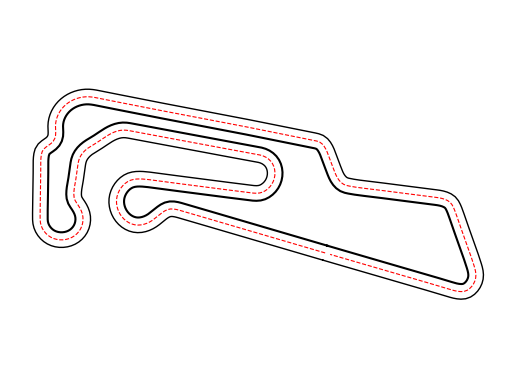

In [34]:
# Create a reference path
ref_path = RefPath(center_line, width_left = 0.6, width_right = 0.6, speed_limt = 5, loop = True)

# Visualize the reference path
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
plt.axis('equal')
_ = plt.axis('off')


## Test your ILQR planner
The planner need to warmup for a few steps for the first time it is run. This process will takes 10-30 seconds depending on your computer.

In [48]:
ilqr = ILQR(config_file)
ilqr.update_ref_path(ref_path)


Line Search Alphas:  [10.    1.    0.1   0.01]
ILQR setting: ILQR config: {'num_dim_x': 5, 'num_dim_u': 2, 'T': 10, 'dt': 0.1, 'platform': 'cpu', 'max_iter': 50, 'tol': 0.05, 'line_search_base': 0.1, 'line_search_a': -1, 'line_search_b': 3, 'line_search_c': 1, 'reg_min': '1e-5', 'reg_max': '1e8', 'reg_scale_down': 5, 'reg_scale_up': 5, 'reg_init': 1.0, 'max_attempt': 5, 'wheelbase': 0.257, 'radius': 0.13, 'width': 0.22, 'length': 0.4, 'delta_max': 0.35, 'delta_min': -0.35, 'v_max': 5.0, 'v_min': 0.0, 'omega_min': -6.0, 'omega_max': 6.0, 'a_max': 5.0, 'a_min': -5.0, 'v_ref': 5.0, 'dim_closest_pt_x': 0, 'dim_closest_pt_y': 1, 'dim_path_slope': 2, 'path_cost_type': 'quadratic', 'path_weight': 2.0, 'path_huber_delta': 2, 'vel_cost_type': 'quadratic', 'vel_weight': 0.2, 'vel_huber_delta': 1, 'dim_vel_limit': 3, 'vel_limit_a': 10.0, 'vel_limit_b': 1.0, 'heading_cost_type': 'quadratic', 'heading_weight': 1, 'heading_huber_delta': 1, 'lat_accel_thres': 6.0, 'lat_accel_a': 5.0, 'lat_accel_b': 2

### Plan for one step

[1.51096141 0.53932247]
[1.84514434 0.73794034]
[1.87657792 1.19496513]
[1.88186664 1.55888632]
[1.86777658 2.15230785]
[1.87566123 2.99909055]
[1.87710193 3.08398611]
[1.87760463 2.94574619]
[1.87766052 2.91814244]
J_new: 40486.46484375; J: 598.8351440429688
J_new: 2798.051025390625; J: 598.8351440429688
J_new: 1449.8634033203125; J: 598.8351440429688
J_new: 149.3772430419922; J: 598.8351440429688
[1.53858369 0.61835006]
[1.86903447 0.87069821]
[1.91226829 1.4817148 ]
[1.8926748  5.53361276]
[1.89899816 5.44872412]
[1.90149379 3.69506364]
[1.90349909 3.13613901]
[1.90501386 3.03049834]
[1.90777132 3.02919558]
J_new: 14099.3330078125; J: 149.3772430419922
J_new: 2223.171142578125; J: 149.3772430419922
J_new: 825.5244140625; J: 149.3772430419922
J_new: 141.9585723876953; J: 149.3772430419922
[1.725805   1.01274092]
[2.05566683 1.67506417]
[2.07884872 2.21256328]
[2.09053109 5.9668104 ]
[2.09471967 6.04044709]
[2.09677997 4.19711382]
[2.09872487 3.59183029]
[2.1007054  3.46378173]
[2.105

Text(0.5, 1.0, 'Lateral Acceleration')

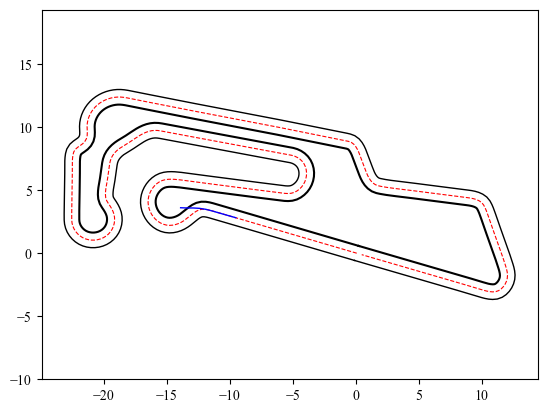

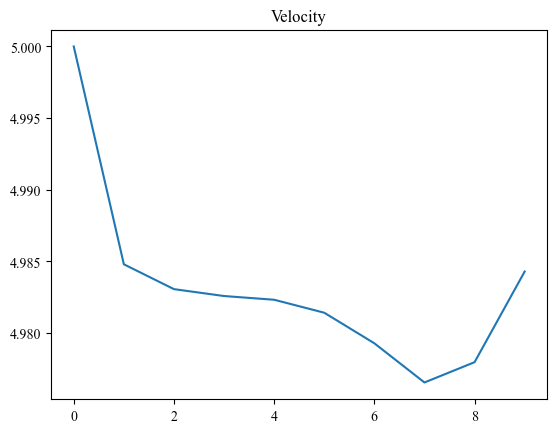

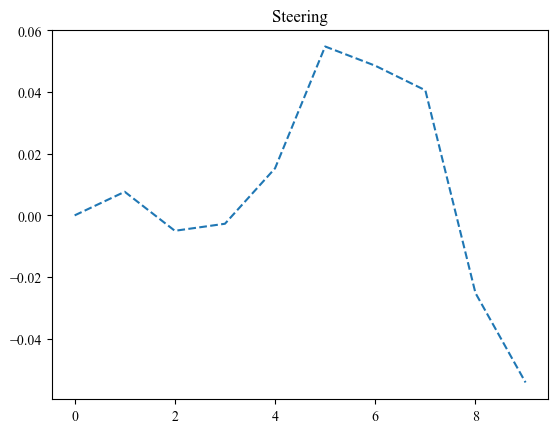

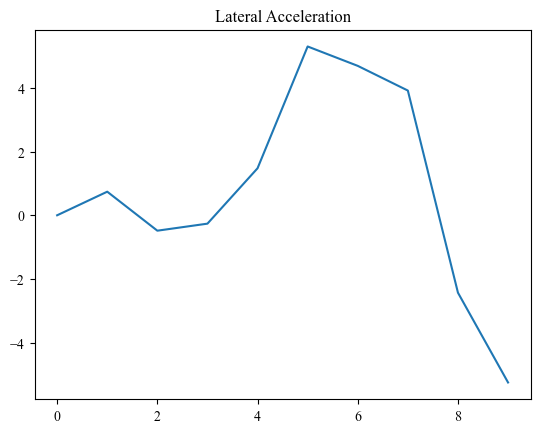

In [51]:
# Create an ILQR solver
x_init = np.array([x[60], y[60], 5, np.arctan2(y[61]-y[60], x[61]-x[60]), 0])
plan = ilqr.plan(x_init)

# Visualize the reference path
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
plt.plot(plan['trajectory'][0, :], plan['trajectory'][1, :], 'b-', linewidth=1)
plt.axis('equal')

plt.figure()
a = plan['trajectory'][2, :] 
plt.plot(a)
plt.title('Velocity')

plt.figure()
# plt.plot(plan['controls'][0,:])
plt.plot(plan['trajectory'][-1,:], '--')
plt.title('Steering')

plt.figure()
a = plan['trajectory'][2, :]**2 / 0.257 * np.tan(plan['trajectory'][-1, :])
plt.plot(a)
plt.title('Lateral Acceleration')


### Plan for the entire track

In [52]:
itr_receding = 400
init_control = np.zeros((2, ilqr.T))
x_cur = np.array([x[0], y[0], 4, np.arctan2(y[1]-y[0], x[1]-x[0]), 0])
state_history = np.zeros((5,itr_receding + 1))
state_history[:,0] = x_cur
plan_history = np.zeros((5, ilqr.T, itr_receding))
control_history = np.zeros((2,itr_receding))
t_process = np.zeros(itr_receding)
for i in (pbar := tqdm.tqdm(range(itr_receding))):
    plan = ilqr.plan(x_cur, init_control)
    
    trajectory = plan['trajectory']
    controls = plan['controls']
    
    # record the state and control
    state_history[:,i+1]  = trajectory[:,1]
    control_history[:,i] = controls[:,0]
    plan_history[:,:,i] = trajectory
    t_process[i] = plan['t_process']
    
    # prepare for next iteration
    x_cur = trajectory[:,1] 
    init_control[:,:-1] = controls[:,1:]
    
    pbar.set_description(f"ILQR takes : {plan['t_process']:.2f} sec']")

  0%|                                                                                                                                                                             | 0/400 [00:00<?, ?it/s]

ILQR takes : 0.01 sec']:   4%|████▊                                                                                                                                      | 14/400 [00:00<00:05, 67.16it/s]

[0.5108704 0.5307409]
[0.51190852 0.75630554]
[0.51294173 1.5194283 ]
[0.51396585 2.02605889]
[0.5149768  2.13463033]
[0.51597075 2.2280526 ]
[0.51694412 2.29008093]
[0.51789364 2.30681448]
[0.5188164 2.3095519]
J_new: 160.97991943359375; J: 145.89901733398438
J_new: -4.7516865730285645; J: 145.89901733398438
[0.55886125 0.60900169]
[0.57209936 0.97059013]
[0.5844613  1.96075024]
[0.59459716 2.4044542 ]
[0.60147906 2.51171836]
[0.60493028 2.58573567]
[0.60572078 2.58161495]
[0.60506546 2.52477833]
[0.60396042 2.44530852]
J_new: -4.647261142730713; J: -4.7516865730285645
J_new: -4.772196292877197; J: -4.7516865730285645
0.05
0.02050972
converged after  1  steps.
[0.52044843 0.53761268]
[0.53084259 0.86841448]
[0.54071347 1.88369842]
[0.54923217 2.33215256]
[0.55548789 2.43534837]
[0.55887071 2.53318332]
[0.55944404 2.55207927]
[0.55797749 2.51373091]
[0.55552815 2.45532144]
J_new: 6.529153347015381; J: -5.528412342071533
J_new: -5.261259078979492; J: -5.528412342071533
J_new: -5.5120906

ILQR takes : 0.01 sec']:   6%|███████▋                                                                                                                                   | 22/400 [00:00<00:05, 71.51it/s]

[0.72580457 2.70391814]
[0.7447924  2.75778879]
[0.76214067 2.76900122]
[0.77309983 2.77531305]
J_new: -1.211500883102417; J: -6.261630535125732
J_new: -6.1583476066589355; J: -6.261630535125732
J_new: -6.255020618438721; J: -6.261630535125732
J_new: -6.260997295379639; J: -6.261630535125732
line search failed with reg =  5.0  at step  0
[0.57047897 0.54025684]
[0.62455129 0.91424015]
[0.66376892 2.01597245]
[0.68815657 2.44177996]
[0.70190056 2.56483281]
[0.71461294 2.69545813]
[0.72952679 2.74959709]
[0.74659827 2.76347553]
[0.76297441 2.77465751]
J_new: -0.1901874542236328; J: -6.651533126831055
J_new: -6.5447845458984375; J: -6.651533126831055
J_new: -6.647438049316406; J: -6.651533126831055
J_new: -6.651175022125244; J: -6.651533126831055
line search failed with reg =  5.0  at step  0
[0.57047897 0.54025715]
[0.62455129 0.91425494]
[0.66376892 2.01602177]
[0.68815657 2.44181263]
[0.70190056 2.56376147]
[0.70921951 2.68961856]
[0.71839307 2.74111704]
[0.73141914 2.7553058 ]
[0.7475

ILQR takes : 0.06 sec']:   8%|██████████▍                                                                                                                                | 30/400 [00:00<00:06, 56.85it/s]

[0.56028679 0.73596215]
[0.60573796 5.05912688]
[0.6404128  4.56371588]
[0.66348637 2.93180658]
[0.67732688 9.97200576]
[ 0.6896702  32.38185133]
[ 0.72921433 72.88119023]
[ 0.78984805 79.41784375]
[ 0.80494504 44.49873694]
J_new: 5412.3056640625; J: 111.98153686523438
J_new: 3872.51953125; J: 111.98153686523438
J_new: 1520.173095703125; J: 111.98153686523438
J_new: 1349.437255859375; J: 111.98153686523438
line search failed with reg =  5.0  at step  0
[0.57154473 0.64497214]
[0.63206219 1.60188201]
[0.66377576 3.21472618]
[0.68008323 3.78491896]
[0.69185994 4.18049911]
[ 0.70043259 11.03499233]
[ 0.70696615 33.71598787]
[ 0.74192593 74.96051437]
[ 0.79931882 82.32950193]
J_new: 3119.036376953125; J: 111.00694274902344
J_new: 941.3336181640625; J: 111.00694274902344
J_new: 1382.859375; J: 111.00694274902344
J_new: 1473.7164306640625; J: 111.00694274902344
line search failed with reg =  5.0  at step  0
[0.56013995 0.62805971]
[0.6207047  0.85804333]
[0.68471501 1.80135269]
[0.69517518 3

ILQR takes : 0.03 sec']:   9%|████████████▊                                                                                                                              | 37/400 [00:00<00:09, 38.86it/s]

J_new: 484.44415283203125; J: 359.17474365234375
J_new: 359.1016540527344; J: 359.17474365234375
[ 783.69941564 1049.55601414]
[ 783.71211574 1255.58234082]
[  783.56660745 57520.88297141]
[ 783.73116393 1461.7841877 ]
[ 784.26186307 1247.73148006]
[ 784.15543381 1249.60067474]
[ 784.34445969 1499.18022997]
[ 784.38348272 3378.62441345]
[ 784.63746149 2701.57655502]
J_new: 382.0345764160156; J: 359.1016540527344
J_new: 355.9714660644531; J: 359.1016540527344
[3916.48807853 5246.15261774]
[3916.17097622 6245.19280839]
[  3913.97057829 289173.28073963]
[3916.18174442 7260.37044441]
[3917.15446427 6148.8951217 ]
[3916.96213896 6193.20580356]
[3917.35763336 6925.56969847]
[3917.51867319 8316.84300244]
[3917.77817111 8646.371121  ]
J_new: 354.3587341308594; J: 355.9714660644531
[19580.4270067 26233.286061 ]
[19578.45269714 31090.15306194]
[  19565.97646834 1467278.38054146]
[19578.42575674 36071.70133441]
[19580.90978193 29843.02365287]
[19581.89189042 31589.44149416]
[19580.97967063 32129.

ILQR takes : 0.01 sec']:   9%|████████████▊                                                                                                                              | 37/400 [00:00<00:09, 38.86it/s]

J_new: 31.699542999267578; J: 37.33369064331055
[3916.48332942 4816.54742481]
[3916.96070274 4843.8746125 ]
[3916.93549853 4880.99513183]
[3917.07344969 4898.77539889]
[3917.92941897 4991.82925301]
[3917.79146476 4938.70772951]
[3917.90740773 4913.29481807]
[3916.69242912 4919.88166245]
[3916.81342677 5066.96308462]
J_new: 31.01003074645996; J: 31.699542999267578
[19580.41131671 24082.56563931]
[19580.77578849 24216.4623882 ]
[19580.57805144 24391.49548169]
[19580.651658   24391.45713625]
[19581.3625443  24388.22933329]
[19581.27270421 24202.04162685]
[19581.55418533 24170.27219568]
[19582.85929295 24706.49738261]
[19580.46726552 25311.71514765]
J_new: 30.903928756713867; J: 31.01003074645996
[ 97900.05138433 120412.55494485]
[ 97899.85089658 121079.20501668]
[ 97898.78057429 121941.93615032]
[ 97898.40637476 121841.14044853]
[ 97898.6821003  121457.68391755]
[ 97898.15039208 120518.74677484]
[ 97898.32563456 120388.68782716]
[ 97900.22399936 122516.39182645]
[ 97898.70681641 126328.70

ILQR takes : 0.01 sec']:  12%|████████████████▋                                                                                                                          | 48/400 [00:01<00:09, 35.59it/s]

[0.51084439 0.51853532]
[0.51199548 0.58950702]
[0.51329194 0.84481576]
[0.51470728 1.22797729]
[0.51629151 1.43659985]
[0.51823538 1.50485999]
[0.52088173 1.54823074]
[0.52451496 1.59062423]
[0.53209164 2.59258525]
J_new: 486.4339294433594; J: 4.427188396453857
J_new: 4.945224285125732; J: 4.427188396453857
J_new: 4.3804121017456055; J: 4.427188396453857
0.05
0.046776295
converged after  0  steps.
[0.51087324 0.51891401]
[0.512212   0.59630834]
[0.51379845 0.87814796]
[0.51552295 1.27516992]
[0.51738443 1.46124476]
[0.51955577 1.51648948]
[0.52233081 1.55902052]
[0.52596571 1.59428864]
[0.53050974 1.6184222 ]
J_new: 1045.56640625; J: 1.8591597080230713
J_new: 2.2846484184265137; J: 1.8591597080230713
J_new: 1.8082354068756104; J: 1.8591597080230713
[0.55097286 0.57085274]
[0.55631463 0.66376158]
[0.56177841 0.96270701]
[0.56713389 1.35165085]
[0.5722829  1.53231071]
[0.5773183  1.59101128]
[0.58244061 1.63174287]
[0.58780093 1.65954168]
[0.59337478 1.67561757]
J_new: 724.4943237304688

ILQR takes : 0.02 sec']:  15%|█████████████████████▏                                                                                                                     | 61/400 [00:01<00:07, 45.67it/s]

[ 0.52037136 21.26888402]
J_new: 604.2367553710938; J: -3.5013837814331055
J_new: -3.0104827880859375; J: -3.5013837814331055
J_new: -3.5061564445495605; J: -3.5013837814331055
0.05
0.004772663
converged after  0  steps.
[0.51083608 0.52880141]
[0.51186168 0.76009349]
[0.5128815  1.56795052]
[0.51388113 2.0279138 ]
[0.51485614 2.06160337]
[0.51582068 2.10858268]
[0.51677514 2.15308513]
[0.51769225 2.17080225]
[0.51917869 5.50014995]
J_new: 432.3106689453125; J: -3.623656749725342
J_new: -3.3379034996032715; J: -3.623656749725342
J_new: -3.704861879348755; J: -3.623656749725342
[0.55093656 0.59110863]
[0.55594107 0.84460602]
[0.56080388 1.63970913]
[0.56543175 2.09622472]
[0.56975738 2.1512123 ]
[0.57374596 2.19783809]
[0.57736875 2.23224923]
[0.58058868 2.2428061 ]
[0.58401927 5.79754898]
J_new: 338.369384765625; J: -3.704861879348755
J_new: -3.620387554168701; J: -3.704861879348755
J_new: -3.738128900527954; J: -3.704861879348755
0.05
0.03326702
converged after  1  steps.
[0.51083806 

ILQR takes : 0.01 sec']:  18%|█████████████████████████▋                                                                                                                 | 74/400 [00:01<00:06, 49.68it/s]

[0.53058949 0.53940698]
[0.55055695 0.92131114]
[0.56984097 2.04588046]
[0.58816033 2.42855193]
[0.60527722 2.52120855]
[0.62089223 2.64500363]
[0.6343423  2.69752894]
[0.6435762 2.702346 ]
[0.64587547 2.69661726]
J_new: 618.31298828125; J: -6.599781036376953
J_new: -6.140908241271973; J: -6.599781036376953
J_new: -6.361061096191406; J: -6.599781036376953
J_new: -6.388737201690674; J: -6.599781036376953
line search failed with reg =  5.0  at step  0
[0.530653   0.54622212]
[0.55105561 1.22932196]
[0.56898647 2.7005485 ]
[0.58558301 2.60422088]
[0.60112781 2.55846949]
[0.61552834 2.6540354 ]
[0.62875172 2.69792858]
[0.64031117 2.70427417]
[0.64814515 2.7074896 ]
J_new: 1160.22509765625; J: -5.330463886260986
J_new: -5.742739677429199; J: -5.330463886260986
[0.6271326  0.61645806]
[0.70402042 1.0620429 ]
[0.76484796 2.18453628]
[0.80847448 2.56407243]
[0.83699498 2.69911876]
[0.85024235 2.82081308]
[0.84614296 2.85041283]
[0.82377125 2.83523748]
[0.7865544  2.80845432]
J_new: 446.6068725

ILQR takes : 0.01 sec']:  20%|███████████████████████████▊                                                                                                               | 80/400 [00:01<00:07, 43.76it/s]

J_new: 46.03048324584961; J: 45.62022018432617
line search failed with reg =  25.0  at step  0
[0.51069514 1.27052338]
[0.5123412  1.63014576]
[0.52220928 1.81200497]
[0.55487029 3.2611721 ]
[0.56260997 5.03486839]
[0.56502055 4.34727513]
[0.56896306 3.63922395]
[0.57423116 3.23387398]
[-0.69035541  4.91563403]
[0.55081429 1.32764116]
[0.55644736 1.69072646]
[0.57009769 1.87393074]
[0.60583611 3.32175905]
[0.61583784 5.10029503]
[0.61989003 4.41921571]
[0.62470298 3.70989567]
[0.62999822 3.30167814]
[-0.64277377  4.98796522]
J_new: 32409.388671875; J: 87.41099548339844
J_new: 528.979248046875; J: 87.41099548339844
J_new: 113.30683135986328; J: 87.41099548339844
J_new: 87.25348663330078; J: 87.41099548339844
[0.75130922 1.90940565]
[0.80868051 3.19808948]
[0.85594715 4.97564338]
[0.92585519 5.2542361 ]
[0.92971332 6.04988157]
[0.9133996  4.78591547]
[0.90859528 3.4063229 ]
[0.90927556 2.78481344]
[-0.47439977  5.20366194]
J_new: 56495.8984375; J: 87.25348663330078
J_new: 945.20330810546

ILQR takes : 0.01 sec']:  22%|██████████████████████████████▏                                                                                                            | 87/400 [00:02<00:06, 46.05it/s]

J_new: 1763.9019775390625; J: 6.224060535430908
J_new: 84.22588348388672; J: 6.224060535430908
J_new: 5.601943016052246; J: 6.224060535430908
[0.55129283 0.56447296]
[0.55730112 0.65465282]
[0.56222635 1.00711722]
[0.56636186 1.45433068]
[0.57026371 1.56329905]
[0.57424719 1.5230275 ]
[0.57829051 1.47773689]
[0.5822664  1.42147594]
[0.58622812 1.39732157]
J_new: 1203.0955810546875; J: 5.601943016052246
J_new: 68.70529174804688; J: 5.601943016052246
J_new: 62.3787841796875; J: 5.601943016052246
J_new: 5.555037021636963; J: 5.601943016052246
0.05
0.046905994
converged after  1  steps.
[0.51198856 0.51903125]
[0.51527547 0.67517942]
[0.51693872 1.31988268]
[0.5173446  1.76265713]
[0.51747209 1.67720777]
[0.518125   1.56699415]
[0.51943329 1.51324214]
[0.52108812 1.47220201]
[0.52291413 1.40388988]
J_new: 2012.9967041015625; J: 7.5700836181640625
J_new: 575.80810546875; J: 7.5700836181640625
J_new: 574.1881713867188; J: 7.5700836181640625
J_new: 7.499499797821045; J: 7.5700836181640625
[0.

ILQR takes : 0.02 sec']:  24%|█████████████████████████████████▋                                                                                                         | 97/400 [00:02<00:07, 42.74it/s]

J_new: 3620.742431640625; J: 24.69883918762207
J_new: 2033.8323974609375; J: 24.69883918762207
J_new: 2175.32373046875; J: 24.69883918762207
J_new: 2188.931640625; J: 24.69883918762207
line search failed with reg =  5.0  at step  0
[0.50809772 1.91304404]
[0.50774438 2.33058107]
[0.50596308 2.55314307]
[0.5080743  3.13968591]
[0.52082353 2.66998922]
[0.52148654 2.99333463]
[0.52180403 2.63185555]
[0.52224513 2.44204047]
[0.52175119 2.30129665]
J_new: 3998.546630859375; J: 25.650543212890625
J_new: 1795.224853515625; J: 25.650543212890625
J_new: 23.157575607299805; J: 25.650543212890625
[0.54917216 1.73736511]
[0.55365048 2.09175831]
[0.55702416 2.26095775]
[0.56331649 2.7025409 ]
[0.57544004 2.70858337]
[0.57970152 2.96335728]
[0.58320838 2.66551278]
[0.58637501 2.48233798]
[0.58844988 2.32462602]
J_new: 3133.63720703125; J: 23.157575607299805
J_new: 1659.4798583984375; J: 23.157575607299805
J_new: 21.074384689331055; J: 23.157575607299805
[0.75040362 1.85053231]
[0.80802607 2.13765238

ILQR takes : 0.02 sec']:  27%|████████████████████████████████████▉                                                                                                     | 107/400 [00:02<00:06, 44.97it/s]

J_new: 451.145263671875; J: -1.7716996669769287
J_new: -1.7133429050445557; J: -1.7716996669769287
J_new: -1.8241630792617798; J: -1.7716996669769287
[0.75143451 0.84968896]
[0.80837028 1.14733895]
[0.84725335 1.57236334]
[0.87023415 1.90886765]
[0.88267891 2.0914617 ]
[0.88910398 2.16651965]
[0.89234687 2.18242842]
[0.89400312 2.17013983]
[0.8949717  2.13827219]
J_new: 16.497940063476562; J: -1.8241630792617798
J_new: -1.8950610160827637; J: -1.8241630792617798
[1.75392748 2.22580072]
[2.01211108 3.02220488]
[2.05527671 3.2151766 ]
[2.06115414 3.39854218]
[2.06192801 3.58017198]
[2.06203013 3.6897566 ]
[2.06205652 3.72600509]
[2.06212436 3.71162978]
[2.06233066 3.6533886 ]
J_new: -1.8471648693084717; J: -1.8950610160827637
J_new: -1.9117685556411743; J: -1.8950610160827637
0.05
0.01670754
converged after  3  steps.
[0.51083073 0.52216959]
[0.51184334 0.63760066]
[0.51283734 1.0652293 ]
[0.51381142 1.55455477]
[0.51477594 1.71279764]
[0.51572938 1.76961874]
[0.51666309 1.82163034]
[0.5

ILQR takes : 0.01 sec']:  28%|██████████████████████████████████████▉                                                                                                   | 113/400 [00:02<00:05, 48.93it/s]

J_new: -4.996108055114746; J: -4.9926838874816895
0.05
0.0034241676
converged after  1  steps.
[0.51087363 0.53126134]
[0.51192468 0.78243666]
[0.51296144 1.62657285]
[0.51398366 2.09698077]
[0.51499794 2.16675842]
[0.51600208 2.24867187]
[0.51698446 2.30289996]
[0.51793535 2.30802976]
[0.51884739 2.29125722]
J_new: 287.636474609375; J: -5.077752590179443
J_new: -4.563101768493652; J: -5.077752590179443
J_new: -5.152496814727783; J: -5.077752590179443
[0.55099888 0.59693769]
[0.55605324 0.87826573]
[0.56095607 1.71982641]
[0.56562591 2.18226898]
[0.57000013 2.26957061]
[0.57402612 2.34683987]
[0.57766404 2.38813719]
[0.58089611 2.38503591]
[0.58372463 2.36195361]
J_new: 150.42372131347656; J: -5.152496814727783
J_new: -4.917526721954346; J: -5.152496814727783
J_new: -5.1372151374816895; J: -5.152496814727783
J_new: -5.158773899078369; J: -5.152496814727783
0.05
0.0062770844
converged after  1  steps.
[0.51090398 0.53249567]
[0.51199026 0.82292198]
[0.51305944 1.7734714 ]
[0.51410569 2.

ILQR takes : 0.01 sec']:  31%|██████████████████████████████████████████▊                                                                                               | 124/400 [00:02<00:07, 36.10it/s]

J_new: 2062.333740234375; J: -1.7313547134399414
J_new: 820.46826171875; J: -1.7313547134399414
J_new: 810.4407958984375; J: -1.7313547134399414
J_new: -1.7761735916137695; J: -1.7313547134399414
0.05
0.04481888
converged after  2  steps.
[0.51186714 0.53236454]
[0.51478617 0.73878769]
[0.51817567 2.4969519 ]
[0.52032268 3.67009854]
[0.52222374 2.98842368]
[0.52436932 2.63075203]
[0.52715508 2.51231311]
[0.53049748 2.50401105]
[0.53383445 2.51407711]
J_new: 5887.3369140625; J: 12.280619621276855
J_new: 1132.84033203125; J: 12.280619621276855
J_new: 162.68807983398438; J: 12.280619621276855
J_new: 9.77521800994873; J: 12.280619621276855
[0.55199985 0.6071446 ]
[0.55887433 0.85262242]
[0.56627903 2.55119942]
[0.57196097 3.7514585 ]
[0.57694543 3.09737824]
[0.58168157 2.71886234]
[0.58652172 2.58792716]
[0.5913617  2.57622092]
[0.59565026 2.58540058]
J_new: 4807.73388671875; J: 9.77521800994873
J_new: 875.423828125; J: 9.77521800994873
J_new: 111.64079284667969; J: 9.77521800994873
J_new:

ILQR takes : 0.02 sec']:  32%|████████████████████████████████████████████▏                                                                                             | 128/400 [00:03<00:07, 34.29it/s]

J_new: 847.509765625; J: 11.115623474121094
J_new: 64.4025650024414; J: 11.115623474121094
J_new: 9.137136459350586; J: 11.115623474121094
[ 0.55070437 10.7561789 ]
[ 0.55550695 11.9650434 ]
[ 0.56078024 13.40810586]
[ 0.56774487 14.30336111]
[ 0.57709277 23.08715048]
[  0.58546338 216.63594244]
[  0.62842084 368.34674323]
[  0.70703873 126.19968785]
[ 0.57646256 37.95944751]
J_new: 696.3057250976562; J: 9.137136459350586
J_new: 39.14238357543945; J: 9.137136459350586
J_new: 7.588596343994141; J: 9.137136459350586
[ 0.75149597 10.24087073]
[ 0.80855093 11.46326132]
[ 0.84815576 12.75956598]
[ 0.87316971 12.99851875]
[ 0.88848909 19.48482535]
[  0.8939676  193.51741156]
[  0.91952964 332.52988944]
[  0.97013627 119.00433525]
[ 0.93912843 55.31588781]
J_new: 418.8932189941406; J: 7.588596343994141
J_new: 17.05974769592285; J: 7.588596343994141
J_new: 6.54774808883667; J: 7.588596343994141
[ 1.75426701 10.92385705]
[ 2.01282887 12.05329862]
[ 2.05653852 13.01165279]
[ 2.06333373 12.945316

ILQR takes : 0.06 sec']:  34%|██████████████████████████████████████████████▏                                                                                           | 134/400 [00:03<00:08, 31.63it/s]

[0.53291187 0.54722134]
[0.55528423 0.88202787]
[0.57835323 1.87033043]
[0.60098067 2.38157237]
[0.62097101 2.53838621]
[0.63507479 2.68179547]
[ 0.63882261 57.18775398]
[  0.63317389 128.23405958]
[  0.62515837 174.13689949]
J_new: 946.6928100585938; J: -5.406327724456787
J_new: 17.435461044311523; J: -5.406327724456787
J_new: -5.426733016967773; J: -5.406327724456787
0.05
0.020405293
converged after  0  steps.
[0.53473985 0.60280188]
[0.5589461  1.39532459]
[0.57987036 2.80540817]
[0.60001875 2.60784313]
[0.61935332 2.54552753]
[0.63601813 2.66016861]
[0.64689307 2.74640061]
[ 0.64786162 53.3253365 ]
[  0.640021   120.49024545]
J_new: 1164.8624267578125; J: -4.695669651031494
J_new: 29.93889617919922; J: -4.695669651031494
J_new: -4.832048416137695; J: -4.695669651031494
[0.57692563 0.87780694]
[0.60763806 1.77084805]
[0.63285703 3.06681891]
[0.65493388 3.00014768]
[0.67511211 2.79290174]
[0.69142736 2.76055002]
[0.70090035 2.8380412 ]
[ 0.69996493 49.93275129]
[  0.69023004 113.6736

ILQR takes : 0.11 sec']:  34%|██████████████████████████████████████████████▏                                                                                           | 134/400 [00:03<00:08, 31.63it/s]

[0.54171168 0.54989959]
[0.57193935 0.89189617]
[0.59777963 2.0203187 ]
[0.62068856 7.49185286]
[ 0.64318035 22.3403509 ]
[ 0.66485404 10.26393302]
[0.67731584 6.0954083 ]
[0.68944235 3.58163794]
[0.69355047 2.92110896]
J_new: 877.3662109375; J: -5.462718963623047
J_new: -5.309473037719727; J: -5.462718963623047
J_new: -5.492813587188721; J: -5.462718963623047
0.05
0.030094624
converged after  0  steps.
[0.54176454 0.54846357]
[0.5757728  1.18597375]
[0.6025165  2.62256204]
[0.62364883 2.65403869]
[0.64227032 7.56091825]
[ 0.66098957 22.34314731]
[ 0.67984265 11.05105258]
[0.69011005 6.3708902 ]
[0.69989849 3.61443528]
J_new: 1400.682373046875; J: -4.024147033691406
J_new: 5.505759239196777; J: -4.024147033691406
J_new: -4.211094379425049; J: -4.024147033691406
[0.58584462 0.61869695]
[0.62355536 1.25999165]
[0.6540078  2.62954085]
[0.67729099 2.72043924]
[0.6969154  7.55564172]
[ 0.71570389 22.46177196]
[ 0.73412483 11.81509398]
[0.74317397 6.61786886]
[0.75045446 3.72260482]
J_new: 1

ILQR takes : 0.11 sec']:  34%|███████████████████████████████████████████████▌                                                                                          | 138/400 [00:03<00:11, 23.43it/s]

J_new: -4.402785778045654; J: -4.265084743499756
[1.79706183 7.81139605]
[ 2.0656007  76.05201152]
[ 2.11762726 34.8735597 ]
[  2.13369452 127.57266583]
[2.14376043 9.36166175]
[2.15639536 6.28854614]
[ 2.16608049 23.80527736]
[ 2.17110206 27.08079082]
[ 2.16694483 18.01997651]
J_new: -4.176035404205322; J: -4.402785778045654
J_new: -4.441237926483154; J: -4.402785778045654
0.05
0.03845215
converged after  3  steps.
[0.55516157 7.80037073]
[0.61076015 9.33995512]
[ 0.67599999 40.42387146]
[ 0.73431768 39.85256965]
[ 0.78321849 64.2608646 ]
[ 0.72727582 11.92521095]
[0.75275982 3.95319688]
[ 0.77378641 21.5394217 ]
[ 0.78837535 24.29988197]
J_new: 327.73779296875; J: -1.7425771951675415
J_new: -2.7649638652801514; J: -1.7425771951675415
[0.58408599 7.38484751]
[ 0.62590751 64.87456999]
[ 0.67653421 48.94751455]
[ 0.73165888 69.04935111]
[ 0.78221268 54.28581149]
[  0.83279609 116.5087481 ]
[ 0.79985635 14.51924236]
[ 0.82236656 33.97217545]
[ 0.8369532  58.05407037]
J_new: 3.86809420585

ILQR takes : 0.11 sec']:  35%|████████████████████████████████████████████████▋                                                                                         | 141/400 [00:03<00:14, 17.28it/s]

[ 0.75532011 11.23102063]
[ 0.82347773 67.54294663]
[ 0.88710134 90.1326272 ]
[  0.94210339 123.71968815]
[  0.986026   134.01292791]
[  1.01651984 112.69942239]
[ 1.02920523 58.39229633]
[ 0.9771651  17.63176061]
[ 1.00347845 46.12329303]
J_new: 0.2860136032104492; J: -0.4115292429924011
J_new: -0.48388540744781494; J: -0.4115292429924011
[ 1.75738403 12.67002457]
[ 2.022308   52.15354245]
[ 2.07399403 93.72193232]
[  2.09031701 128.88267216]
[  2.10401105 139.96955087]
[  2.11816447 119.30484539]
[ 2.12880455 62.31849739]
[ 2.10737345 22.46853515]
[ 2.12819001 49.26114756]
J_new: -0.4743862748146057; J: -0.48388540744781494
J_new: -0.48605793714523315; J: -0.48388540744781494
0.05
0.0021725297
converged after  3  steps.
[ 0.51301794 10.44113534]
[ 0.51804556 11.01922911]
[ 0.53279895 46.74943872]
[ 0.56671001 90.45516274]
[  0.62237477 125.11331728]
[  0.68673607 135.17886345]
[  0.73697992 112.78659878]
[ 0.75574434 54.23535938]
[ 0.68921592 15.11815662]
J_new: 3523.72216796875; J: 

ILQR takes : 0.17 sec']:  35%|████████████████████████████████████████████████▋                                                                                         | 141/400 [00:04<00:14, 17.28it/s]

[0.75146505 0.8306135 ]
[0.809141   2.36282448]
[0.85216833 1.82655223]
[0.88322668 4.27879077]
[0.90915364 9.87243501]
[ 0.93325829 16.24466164]
[ 0.95577637 32.46008055]
[ 0.96774444 33.2586673 ]
[ 0.92545021 14.45286939]
J_new: 848.2871704101562; J: 14.270705223083496
J_new: 9.41257381439209; J: 14.270705223083496
[1.75412074 3.39645461]
[2.01204278 8.19632651]
[  1.98220956 150.10717516]
[ 2.03497165 78.93988445]
[ 2.06799506 39.75560432]
[ 2.08042862 49.32817688]
[ 2.09017287 42.44073646]
[ 2.0928349  31.84407343]
[ 2.07122063 14.00305403]
J_new: 59.13536834716797; J: 9.41257381439209
J_new: 8.296887397766113; J: 9.41257381439209
[ 6.76809573 14.04703367]
[ 7.20265469 19.53406419]
[ 7.190747   70.12815401]
[ 7.20866156 49.30362471]
[ 7.21607237 45.01286982]
[ 7.21963199 55.30531875]
[ 7.22320783 59.01482044]
[ 7.22437993 42.68083286]
[ 7.21567446 24.22481208]
J_new: 7.805286884307861; J: 8.296887397766113
[31.83888926 51.14503122]
[32.33622051 64.26174644]
[32.32065564 48.63179098

ILQR takes : 0.07 sec']:  36%|█████████████████████████████████████████████████▋                                                                                        | 144/400 [00:04<00:19, 13.34it/s]

J_new: 13.117154121398926; J: 6.717322826385498
J_new: 6.545385837554932; J: 6.717322826385498
[ 6.76803356 12.44900484]
[ 7.20351655 22.74055346]
[ 7.21239471 37.49947971]
[ 7.21477902 62.81723337]
[ 7.22014183 86.57636096]
[  7.22598128 114.00361762]
[  7.23167094 143.99167706]
[  7.23697956 171.47815516]
[  7.24530249 189.06795225]
J_new: 6.433725833892822; J: 6.545385837554932
[31.83455427 49.53247548]
[32.32927538 57.83755041]
[32.33666692 79.14939885]
[32.340699   73.57966522]
[32.34532945 97.55219082]
[ 32.34800203 133.78220181]
[ 32.35045348 168.97762205]
[ 32.35298166 192.55126301]
[ 32.35721783 155.82489888]
J_new: 8.86418342590332; J: 6.433725833892822
J_new: 6.438459873199463; J: 6.433725833892822
J_new: 6.43086051940918; J: 6.433725833892822
0.05
0.0028653145
converged after  5  steps.
[0.50917795 6.19774665]
[0.51980195 6.9921986 ]
[ 0.56051409 13.38537338]
[ 0.64392603 33.03685778]
[ 0.73226353 25.68698848]
[ 0.79241618 47.15860923]
[ 0.8079218  77.85178086]
[  0.7959909

ILQR takes : 0.04 sec']:  36%|██████████████████████████████████████████████████▎                                                                                       | 146/400 [00:04<00:19, 13.30it/s]

[0.5100315 2.5811191]
[0.51381946 3.17799502]
[0.52941019 9.64152376]
[ 0.57176666 21.61305795]
[ 0.64872594 36.5391669 ]
[ 0.73594529 53.49739264]
[ 0.79019777 73.00946762]
[ 0.79931314 96.67642811]
[  0.78273806 125.86897285]
J_new: 20.043861389160156; J: 5.15028190612793
J_new: 4.535189628601074; J: 5.15028190612793
[0.55018202 2.17996377]
[0.55301256 8.58779461]
[ 0.56097147 16.34033421]
[ 0.58727146 26.13928224]
[ 0.64380963 39.35101172]
[ 0.72242528 55.38560037]
[ 0.78765367 74.90110491]
[ 0.81391176 99.50075814]
[  0.8094263  130.53196009]
J_new: 45.248870849609375; J: 4.535189628601074
J_new: 4.459637641906738; J: 4.535189628601074
[0.75084762 2.37434179]
[0.80675759 6.93651857]
[ 0.84788857 15.3062598 ]
[ 0.88318492 26.82250996]
[ 0.92224659 40.8231941 ]
[ 0.96551549 57.29707827]
[ 1.00339686 77.15805227]
[  1.02589644 102.05849046]
[  1.03208829 133.59343335]
J_new: 4.460197448730469; J: 4.459637641906738
J_new: 4.459235668182373; J: 4.459637641906738
0.05
0.00040197372
conve

ILQR takes : 0.04 sec']:  38%|████████████████████████████████████████████████████                                                                                      | 151/400 [00:04<00:18, 13.69it/s]

J_new: 114.87113189697266; J: 1.5660862922668457
J_new: 90.58270263671875; J: 1.5660862922668457
J_new: 1.5168235301971436; J: 1.5660862922668457
0.05
0.049262762
converged after  1  steps.
[0.51026287 1.56277836]
[0.51147018 1.99458047]
[0.51598962 2.54196193]
[0.52690962 3.65974923]
[0.55051089 7.48421226]
[ 0.59189316 14.19835903]
[ 0.64984243 23.36453018]
[ 0.71091173 34.59951135]
[ 0.75596695 47.85399317]
J_new: 264.8558654785156; J: 1.439900279045105
J_new: 176.13491821289062; J: 1.439900279045105
J_new: 1.3504860401153564; J: 1.439900279045105
[0.5504327  1.56319318]
[0.55557798 2.07489204]
[0.56368884 2.81420985]
[0.57826361 4.27874941]
[0.60467632 8.52604294]
[ 0.64695149 15.52706171]
[ 0.70280764 24.91313961]
[ 0.75953939 36.35474267]
[ 0.80066786 49.86178884]
J_new: 225.08059692382812; J: 1.3504860401153564
J_new: 157.34259033203125; J: 1.3504860401153564
J_new: 1.2548786401748657; J: 1.3504860401153564
[0.75112112 1.77044387]
[0.80841665 2.38713956]
[0.85010246 3.31222976]


ILQR takes : 0.14 sec']:  38%|████████████████████████████████████████████████████▊                                                                                     | 153/400 [00:04<00:19, 12.75it/s]

[0.51044591 1.26147175]
[0.51168088 1.64867564]
[0.51534649 1.96110849]
[0.52269315 2.66609026]
[0.53602393 3.93115757]
[0.55914758 6.13622094]
[ 0.59564694 11.20730433]
[ 0.64371342 18.9022098 ]
[ 0.69554641 28.85949105]
J_new: 480.644775390625; J: 1.0957810878753662
J_new: 283.7439880371094; J: 1.0957810878753662
J_new: 285.6390075683594; J: 1.0957810878753662
J_new: 1.0826265811920166; J: 1.0957810878753662
0.05
0.013154507
converged after  0  steps.
[0.51045248 1.25789746]
[0.5117501  1.64491287]
[0.51558894 1.95672022]
[0.52243722 2.42261124]
[0.53205022 3.07439446]
[0.54779557 4.16473287]
[0.5725256  6.31021153]
[ 0.60842498 11.40437624]
[ 0.65317179 19.14895145]
J_new: 656.3995971679688; J: 1.0437366962432861
J_new: 276.8790283203125; J: 1.0437366962432861
J_new: 0.926234245300293; J: 1.0437366962432861
[0.55062616 1.26901879]
[0.5559333  1.69410383]
[0.56354345 2.11408768]
[0.57451943 2.77537455]
[0.58986685 3.8340496 ]
[0.61218651 5.67110337]
[0.64264201 8.67118996]
[ 0.681267

ILQR takes : 0.04 sec']:  39%|█████████████████████████████████████████████████████▍                                                                                    | 155/400 [00:05<00:19, 12.39it/s]

J_new: 3.8671438694000244; J: 0.8532208204269409
J_new: 0.6056872010231018; J: 0.8532208204269409
[0.55066085 1.23146637]
[0.55595682 1.65645405]
[0.56341865 2.12539856]
[0.57429523 2.8885076 ]
[0.58931844 3.86953549]
[0.61028655 5.4208986 ]
[0.63848374 8.0352488 ]
[ 0.67314877 11.90228745]
[ 0.71211379 18.24642391]
J_new: 426.0160217285156; J: 0.6056872010231018
J_new: 1.002390742301941; J: 0.6056872010231018
J_new: 0.5362621545791626; J: 0.6056872010231018
[0.75131675 1.45195277]
[0.80869629 1.95979341]
[0.84973778 2.52381193]
[0.87724248 3.44599115]
[0.89690852 4.77531315]
[0.91381487 6.93359871]
[ 0.93117745 10.32356478]
[ 0.95059635 15.05124289]
[ 0.9724647  22.08442283]
J_new: 189.86949157714844; J: 0.5362621545791626
J_new: 0.3291696310043335; J: 0.5362621545791626
[1.75403909 2.33186411]
[2.01244544 3.21638938]
[2.05648045 3.95487896]
[2.06432303 6.50733322]
[ 2.0669166  14.47458334]
[ 2.06805937 29.27011441]
[ 2.07045569 46.63950368]
[ 2.07510382 64.65626323]
[ 2.08631266 75.8

ILQR takes : 0.03 sec']:  40%|███████████████████████████████████████████████████████▏                                                                                  | 160/400 [00:05<00:15, 15.85it/s]

J_new: 765.7276611328125; J: -0.76424241065979
J_new: -0.5851142406463623; J: -0.76424241065979
J_new: -0.8219239711761475; J: -0.76424241065979
[0.55098046 0.67061473]
[0.5561599  0.86618687]
[0.56100124 1.2967136 ]
[0.56561633 1.84051462]
[0.5711752  3.32543222]
[0.57998029 8.30708172]
[ 0.59750415 11.00118278]
[ 0.62733951 18.73051033]
[ 0.67048553 23.11179633]
J_new: 580.7322998046875; J: -0.8219239711761475
J_new: -0.7511059641838074; J: -0.8219239711761475
J_new: -0.881764829158783; J: -0.8219239711761475
[0.75151872 0.91274599]
[0.80867606 1.22784533]
[0.84750399 1.65528611]
[0.87035251 2.10818722]
[0.88395591 3.73466172]
[0.89391607 9.04387323]
[ 0.90645365 12.3930614 ]
[ 0.92328362 20.51477269]
[ 0.94623941 25.74775717]
J_new: 15.818923950195312; J: -0.881764829158783
J_new: -0.9119976758956909; J: -0.881764829158783
0.05
0.030232847
converged after  2  steps.
[0.51094204 0.56356298]
[0.51231291 0.74501199]
[0.51335273 1.25060158]
[0.51422552 1.73873248]
[0.51510178 1.83539885

ILQR takes : 0.04 sec']:  40%|███████████████████████████████████████████████████████▉                                                                                  | 162/400 [00:05<00:14, 16.29it/s]

J_new: 794.8604125976562; J: -1.9452439546585083
J_new: -2.142610549926758; J: -1.9452439546585083
[0.55094872 0.59390209]
[0.55594978 0.84079362]
[0.56081044 1.59075509]
[0.56544657 2.06569169]
[0.56979792 2.15201056]
[0.57382282 2.19940118]
[0.57746174 2.21969732]
[0.58107803 6.23161907]
[ 0.58354699 24.74232565]
J_new: 83.94371795654297; J: -2.142610549926758
J_new: -2.179678201675415; J: -2.142610549926758
0.05
0.03706765
converged after  1  steps.
[0.51085547 0.53027726]
[0.51187882 0.74914177]
[0.51289708 1.49335049]
[0.51390489 1.99743998]
[0.51490321 2.09414474]
[0.51590285 2.15984602]
[0.51690781 2.1875146 ]
[0.5178728 2.1743929]
[0.51918331 5.00232505]
J_new: 17.143840789794922; J: -3.2598891258239746
J_new: -2.7946581840515137; J: -3.2598891258239746
J_new: -3.228485107421875; J: -3.2598891258239746
J_new: -3.2369532585144043; J: -3.2598891258239746
line search failed with reg =  5.0  at step  0
[0.51085548 0.53028138]
[0.51187889 0.74934146]
[0.51289749 1.49470347]
[0.51390

ILQR takes : 0.08 sec']:  42%|█████████████████████████████████████████████████████████▌                                                                                | 167/400 [00:05<00:13, 17.59it/s]

J_new: 101.26322937011719; J: -4.941402435302734
J_new: -4.253574371337891; J: -4.941402435302734
J_new: -4.957029342651367; J: -4.941402435302734
0.05
0.015626907
converged after  0  steps.
[0.51087784 0.53091706]
[0.51194157 0.76383042]
[0.51299654 1.54972888]
[0.5140506  2.04482758]
[0.51510999 2.14071911]
[0.51616264 2.22920385]
[0.51719715 2.28608142]
[0.51820921 2.29242333]
[0.51919798 2.27609875]
J_new: 227.1671142578125; J: -5.132724285125732
J_new: -4.4352216720581055; J: -5.132724285125732
J_new: -5.158841133117676; J: -5.132724285125732
0.05
0.026116848
converged after  0  steps.
[0.51094914 0.53223597]
[0.51219905 0.80982898]
[0.5134061  1.71614283]
[0.51465025 2.13674553]
[0.51602779 2.17944595]
[0.51748866 2.25935885]
[0.51895324 2.31364802]
[0.52041911 2.319262  ]
[0.5218922  2.30587924]
J_new: 876.8412475585938; J: -5.032714366912842
J_new: -4.313197612762451; J: -5.032714366912842
J_new: -5.091900825500488; J: -5.032714366912842
[0.55109257 0.5984334 ]
[0.55639829 0.90

ILQR takes : 0.08 sec']:  42%|██████████████████████████████████████████████████████████▎                                                                               | 169/400 [00:05<00:16, 14.25it/s]

[0.75328902 0.96297148]
[  0.8075791  139.38607629]
[ 0.85615968 81.30170599]
[0.87730867 3.75408074]
[0.89127872 3.72017534]
[0.89965889 3.06154088]
[0.90309733 2.95025123]
[0.90398124 2.9486882 ]
[0.90400912 2.85823414]
J_new: 364.7796325683594; J: -4.038700580596924
J_new: -4.412698745727539; J: -4.038700580596924
[1.75613154 2.76288208]
[ 2.01426438 55.93237698]
[ 2.06124933 36.10180222]
[ 2.07031539 52.28417576]
[2.06749075 7.1842014 ]
[2.06724806 5.65065564]
[2.06652746 4.87421102]
[2.06576992 4.77460211]
[2.06526167 4.68324584]
J_new: 28.617998123168945; J: -4.412698745727539
J_new: -4.465812683105469; J: -4.412698745727539
[ 6.76877627 12.06201538]
[ 7.20333922 36.33394443]
[ 7.21162746 32.65715207]
[ 7.21341943 36.53292535]
[ 7.21092789 18.98528533]
[ 7.21059196 14.32493394]
[ 7.20992621 13.72978913]
[ 7.20924323 13.55494039]
[ 7.20877362 13.27271582]
J_new: -3.80977201461792; J: -4.465812683105469
J_new: -4.473147392272949; J: -4.465812683105469
0.05
0.007334709
converged aft

ILQR takes : 0.13 sec']:  43%|██████████████████████████████████████████████████████████▉                                                                               | 171/400 [00:06<00:18, 12.42it/s]

J_new: 467.2729187011719; J: -4.089651584625244
J_new: -4.044229984283447; J: -4.089651584625244
J_new: -4.089433193206787; J: -4.089651584625244
J_new: -4.0909423828125; J: -4.089651584625244
0.05
0.0012907982
converged after  1  steps.
[0.527079   0.56189283]
[0.54469375 1.19700736]
[0.56003185 2.62305916]
[0.5754589  3.78070954]
[ 0.58904746 19.02308011]
[ 0.60358444 28.50298321]
[ 0.61896682 27.29333488]
[  0.63367026 171.29890507]
[ 0.61318915 12.35297712]
J_new: 1103.2720947265625; J: -2.3696179389953613
J_new: 24.374797821044922; J: -2.3696179389953613
J_new: -2.546732187271118; J: -2.3696179389953613
[0.56863979 0.61690912]
[0.59144083 1.25444776]
[0.61097106 2.62585883]
[0.62850961 3.36215998]
[ 0.64311364 20.24541517]
[ 0.65731401 30.19243988]
[ 0.67142692 28.48142195]
[  0.68447658 157.55700513]
[ 0.66289791 12.40508732]
J_new: 1067.0325927734375; J: -2.546732187271118
J_new: -0.41641074419021606; J: -2.546732187271118
J_new: -2.7208592891693115; J: -2.546732187271118
[0.769

ILQR takes : 0.06 sec']:  43%|███████████████████████████████████████████████████████████▋                                                                              | 173/400 [00:06<00:19, 11.42it/s]

J_new: 1074.1357421875; J: -2.0563650131225586
J_new: 0.34737497568130493; J: -2.0563650131225586
J_new: -2.3219597339630127; J: -2.0563650131225586
[0.77221115 0.99690374]
[0.84500735 2.51052847]
[0.89163021 3.77878876]
[0.917527   3.40036606]
[0.93103737 3.40478606]
[ 0.93757664 30.48976183]
[ 0.94229671 48.06372476]
[ 0.94719875 45.65269282]
[ 0.93620638 12.65523955]
J_new: 769.897216796875; J: -2.3219597339630127
J_new: -3.377894639968872; J: -2.3219597339630127
[1.77538961 2.81068724]
[2.03921579 4.50469037]
[ 2.08470238 57.54633005]
[2.09310874 6.48311596]
[2.09532686 6.25337054]
[ 2.09516405 25.98293268]
[ 2.09417946 44.44794568]
[ 2.09231488 40.84247753]
[  2.08503154 199.65796218]
J_new: 63.96266555786133; J: -3.377894639968872
J_new: -3.6625235080718994; J: -3.377894639968872
[ 6.78809869 11.9412331 ]
[ 7.22304428 13.9547786 ]
[ 7.23279038 34.66751378]
[ 7.2370297  24.21844373]
[ 7.23643778 18.78318159]
[ 7.23607642 35.43830428]
[ 7.23390632 59.68741411]
[ 7.23027549 57.69797

ILQR takes : 0.05 sec']:  44%|█████████████████████████████████████████████████████████████                                                                             | 177/400 [00:06<00:16, 13.27it/s]

J_new: -3.7471811771392822; J: -3.7281930446624756
0.05
0.018988132
converged after  1  steps.
[0.55693111 1.6166398 ]
[0.6012523  2.33036274]
[0.63816201 2.48766433]
[0.66753215 3.02188862]
[0.69206013 5.58750637]
[ 0.71153157 23.98855328]
[ 0.72826738 16.22922108]
[0.72924096 7.39848431]
[ 0.72172071 28.55082643]
J_new: 512.0482177734375; J: -3.5203545093536377
J_new: -2.253263473510742; J: -3.5203545093536377
J_new: -3.537832260131836; J: -3.5203545093536377
0.05
0.01747775
converged after  0  steps.
[0.55760877 1.87364634]
[0.60518263 3.26271484]
[0.64200089 5.94505129]
[0.66457989 5.00803111]
[0.68425849 3.60834963]
[0.70325548 4.79403295]
[ 0.71935193 23.79468761]
[ 0.73401895 16.35438845]
[0.73317785 7.36954913]
J_new: 506.18450927734375; J: -1.9455244541168213
J_new: -2.7395169734954834; J: -1.9455244541168213
[0.60386348 2.43622978]
[ 0.66150794 10.17951112]
[ 0.71304914 75.24340986]
[7.25619185e-01 1.01583610e+03]
[0.76045019 7.694565  ]
[0.79597856 3.97668221]
[ 0.81760107 2

ILQR takes : 0.12 sec']:  45%|█████████████████████████████████████████████████████████████▊                                                                            | 179/400 [00:06<00:18, 12.16it/s]

[0.54956153 5.83493731]
[0.59109593 7.10107165]
[ 0.63548179 31.10784657]
[ 0.68154073 45.25611303]
[ 0.72529797 58.09147138]
[ 0.76123618 57.84371166]
[ 0.78910117 49.82904834]
[ 0.75892966 14.76709976]
[ 0.77600115 19.54705969]
J_new: 192.90382385253906; J: -2.2480363845825195
J_new: -2.7056801319122314; J: -2.2480363845825195
[0.58216339 6.6911825 ]
[  0.61604421 105.67988231]
[ 0.65572754 59.17760963]
[ 0.69927155 86.41135259]
[ 0.74643375 95.51618942]
[ 0.79257091 87.26655986]
[ 0.82567025 49.44239333]
[ 0.80445034 16.01891906]
[ 0.82256622 21.02355547]
J_new: -1.0855016708374023; J: -2.7056801319122314
J_new: -2.7563040256500244; J: -2.7056801319122314
[0.77912121 7.68211763]
[ 0.85713924 51.60318571]
[ 0.91220308 59.42031533]
[ 0.95170546 84.88572355]
[ 0.98586914 97.5771272 ]
[ 1.01916024 90.71448658]
[ 1.04784    57.22599105]
[ 1.03192933 17.78036557]
[ 1.04812113 23.96026057]
J_new: -2.771732807159424; J: -2.7563040256500244
0.05
0.0154287815
converged after  2  steps.
[0.534

ILQR takes : 0.08 sec']:  45%|██████████████████████████████████████████████████████████████▍                                                                           | 181/400 [00:07<00:18, 11.98it/s]

J_new: 36.160850524902344; J: 1.5832974910736084
J_new: -0.4987126588821411; J: 1.5832974910736084
[0.55772115 8.54334374]
[ 0.5723611  91.58583759]
[ 0.60414017 94.01591762]
[  0.65652812 124.54494036]
[  0.72062754 175.57520519]
[  0.7781417  203.70108868]
[  0.81718277 209.40386072]
[  0.84097902 187.60325345]
[  0.86155434 138.86684009]
J_new: 3.1170825958251953; J: -0.4987126588821411
J_new: -0.9781858921051025; J: -0.4987126588821411
[0.75499945 9.0679349 ]
[ 0.81663652 52.24965205]
[ 0.8668924  86.63196411]
[  0.90915914 134.92211877]
[  0.94716989 177.30533235]
[  0.98152783 207.12770881]
[  1.01178839 213.9447735 ]
[  1.03871608 192.01610811]
[  1.0665638  138.01342496]
J_new: -0.9044269919395447; J: -0.9781858921051025
J_new: -1.05454421043396; J: -0.9781858921051025
[ 1.75727857 10.78522907]
[ 2.01791378 44.36236021]
[ 2.06514889 89.21479042]
[  2.0778499  137.89425727]
[  2.08833581 182.53729525]
[  2.1010119 214.7336595]
[  2.11669108 224.80175893]
[  2.1361149  206.644964

ILQR takes : 0.03 sec']:  46%|███████████████████████████████████████████████████████████████▏                                                                          | 183/400 [00:07<00:17, 12.12it/s]

[0.75131248 6.30879836]
[ 0.80719892 41.22099218]
[ 0.85065751 67.65232902]
[  0.8874153  112.94840646]
[  0.92388353 161.33516951]
[  0.96036568 209.56695321]
[  0.99247135 254.19249936]
[  1.01632829 289.31919037]
[  1.03275888 306.52813419]
J_new: 0.9304287433624268; J: 0.935488224029541
0.05
0.0050594807
converged after  2  steps.
[0.51051905 5.63588385]
[0.51200286 6.56089925]
[0.51578909 4.85338931]
[ 0.52564134 65.56158561]
[  0.55126305 113.33182035]
[  0.59975087 164.58617535]
[  0.66321153 219.12576818]
[  0.71912057 272.29802757]
[  0.75111243 318.53513762]
J_new: 284.68212890625; J: 0.862332284450531
J_new: 18.61414909362793; J: 0.862332284450531
J_new: 0.7711379528045654; J: 0.862332284450531
[0.55065214 5.48170296]
[0.55592669 8.04048679]
[ 0.56482183 11.23342083]
[ 0.58138526 68.9089491 ]
[  0.61617618 116.93933487]
[  0.67179888 168.36527625]
[  0.73455888 222.32792914]
[  0.78235452 274.59949575]
[  0.80547011 319.96350229]
J_new: 109.64494323730469; J: 0.7711379528045

ILQR takes : 0.04 sec']:  47%|████████████████████████████████████████████████████████████████▌                                                                         | 187/400 [00:07<00:15, 14.18it/s]

[0.51128145 0.69381303]
[0.51286861 1.05715643]
[0.51420432 2.92472087]
[ 0.51445179 17.05043839]
[ 0.5140723  50.29330864]
[  0.51816955 105.55025081]
[  0.5396937  158.07335552]
[  0.59050453 219.92531168]
[  0.66604351 282.33426051]
J_new: 331.73138427734375; J: -1.9503757953643799
J_new: -1.8494343757629395; J: -1.9503757953643799
J_new: -1.9378108978271484; J: -1.9503757953643799
J_new: -1.9508821964263916; J: -1.9503757953643799
0.05
0.00050640106
converged after  0  steps.
[0.51149395 0.68562274]
[0.51350806 1.29171707]
[0.51480616 2.60288331]
[0.51595043 3.8665156 ]
[ 0.51599364 17.37623448]
[ 0.5154708  50.60084726]
[  0.51963835 105.91564652]
[  0.5414915  158.60897288]
[  0.59268728 220.52563114]
J_new: 794.9158935546875; J: -1.5795587301254272
J_new: -2.0665383338928223; J: -1.5795587301254272
[0.55456934 0.60751329]
[0.56320639 0.98360327]
[0.57118417 2.00350922]
[0.57791048 2.46656561]
[ 0.58206934 20.30054591]
[ 0.58380052 65.33219658]
[  0.58905207 126.54211428]
[  0.60

ILQR takes : 0.04 sec']:  48%|██████████████████████████████████████████████████████████████████▏                                                                       | 192/400 [00:07<00:12, 16.36it/s]

[0.51451109 0.53814821]
[0.51915606 0.93377751]
[0.52369253 2.10641562]
[0.52804776 2.4420517 ]
[0.53206809 2.46961285]
[0.53550899 2.53334014]
[0.53802413 2.59966244]
[ 0.53826724 23.94026297]
[ 0.53629839 73.86064849]
J_new: 248.07907104492188; J: -3.3091988563537598
J_new: -2.807161331176758; J: -3.3091988563537598
J_new: -3.3011231422424316; J: -3.3091988563537598
J_new: -3.32240629196167; J: -3.3091988563537598
0.05
0.013207436
converged after  0  steps.
[0.51460363 0.53856123]
[0.51933419 0.95279862]
[0.52394632 2.17733995]
[0.52836852 2.5168743 ]
[0.53252556 2.56070366]
[0.53627972 2.60955417]
[0.53940918 2.59107953]
[0.54157867 2.60813634]
[ 0.54146058 23.98439193]
J_new: 437.71466064453125; J: -3.6388936042785645
J_new: -3.205193519592285; J: -3.6388936042785645
J_new: -3.664574146270752; J: -3.6388936042785645
0.05
0.025680542
converged after  0  steps.
[0.51588884 0.5386252 ]
[0.52187369 0.94404369]
[0.5276858  2.15902682]
[0.53319671 2.54079258]
[0.53827486 2.62377965]
[0.5

ILQR takes : 0.04 sec']:  49%|███████████████████████████████████████████████████████████████████▎                                                                      | 195/400 [00:07<00:11, 18.06it/s]

[0.53914056 0.53920532]
[0.56687395 0.89585106]
[0.59035831 1.96508929]
[0.61148828 2.40565388]
[0.62991849 2.52976112]
[0.64465164 2.65667949]
[0.6538207  2.70290014]
[0.6552745  2.69844067]
[0.64806374 2.67902112]
J_new: 5.248757839202881; J: -6.200760841369629
J_new: -5.908350467681885; J: -6.200760841369629
J_new: -6.176979064941406; J: -6.200760841369629
J_new: -6.200529098510742; J: -6.200760841369629
line search failed with reg =  5.0  at step  0
[0.5391452  0.53923202]
[0.56687414 0.89733028]
[0.59035864 1.96884711]
[0.60851119 2.40266362]
[0.62454445 2.52430131]
[0.63874309 2.65312478]
[0.65030833 2.70456253]
[0.65729865 2.70913042]
[0.65735971 2.7035304 ]
J_new: 9.737815856933594; J: -6.412326812744141
J_new: -6.116764068603516; J: -6.412326812744141
J_new: -6.402229309082031; J: -6.412326812744141
J_new: -6.413491249084473; J: -6.412326812744141
0.05
0.0011644363
converged after  0  steps.
[0.53937405 0.53925541]
[0.56722065 0.90032448]
[0.59084428 1.97851926]
[0.6091113  2.

ILQR takes : 0.04 sec']:  50%|█████████████████████████████████████████████████████████████████████▎                                                                    | 201/400 [00:08<00:09, 20.93it/s]

J_new: -6.459836483001709; J: -6.445534706115723
0.05
0.014301777
converged after  0  steps.
[0.54169013 0.53978434]
[0.57162869 0.92107806]
[0.59695222 2.0455952 ]
[0.61655503 2.44903077]
[0.63079083 2.55217884]
[0.6406989  2.66673128]
[0.64733806 2.7057031 ]
[0.65149532 2.70736447]
[0.65661242 2.71431038]
J_new: 39.451168060302734; J: -6.426884651184082
J_new: -6.170727252960205; J: -6.426884651184082
J_new: -6.4362897872924805; J: -6.426884651184082
0.05
0.009405136
converged after  0  steps.
[0.54359322 0.54001267]
[0.57520879 0.92924164]
[0.60168198 2.0713261 ]
[0.6221566  2.46683405]
[0.63716659 2.56851482]
[0.64784805 2.6821167 ]
[0.65526016 2.71841416]
[0.66006252 2.71669709]
[0.66249479 2.7175074 ]
J_new: 47.6693000793457; J: -6.3610310554504395
J_new: -6.117602348327637; J: -6.3610310554504395
J_new: -6.376394271850586; J: -6.3610310554504395
0.05
0.015363216
converged after  0  steps.
[0.545293   0.54023327]
[0.57839548 0.93746999]
[0.60586771 2.09703733]
[0.62685132 2.48432

ILQR takes : 0.04 sec']:  51%|██████████████████████████████████████████████████████████████████████▍                                                                   | 204/400 [00:08<00:10, 17.95it/s]

J_new: -6.225518703460693; J: -6.212997913360596
0.05
0.01252079
converged after  0  steps.
[0.54839579 0.54104401]
[0.58418738 0.97209515]
[0.61342751 2.20279013]
[0.63502822 2.55378741]
[0.65022721 2.64713588]
[0.66100994 2.75317526]
[0.66908625 2.77404033]
[0.67550575 2.76121553]
[0.68035418 2.75401705]
J_new: 146.86329650878906; J: -6.091572284698486
J_new: -6.144779205322266; J: -6.091572284698486
[0.60366924 0.61453661]
[0.65975974 1.02589131]
[0.70840165 2.11089619]
[0.748324   2.54798366]
[0.78041949 2.6890615 ]
[0.80440656 2.805776  ]
[0.81750125 2.84304616]
[0.81556171 2.84105282]
[0.7962087 2.8287659]
J_new: -6.203604221343994; J: -6.144779205322266
[0.7867352  0.98382055]
[0.86730837 1.79239744]
[0.91486857 2.73902613]
[0.93833926 3.11977438]
[0.94914502 3.21566601]
[0.95508677 3.20807251]
[0.9607466  3.19819742]
[0.9680818  3.20760627]
[0.97514101 3.21795284]
J_new: 212.06460571289062; J: -6.203604221343994
J_new: -6.372257232666016; J: -6.203604221343994
[1.78837194 2.825

ILQR takes : 0.04 sec']:  52%|███████████████████████████████████████████████████████████████████████▍                                                                  | 207/400 [00:08<00:11, 17.46it/s]

J_new: 106.49022674560547; J: -6.2145280838012695
J_new: -6.146982669830322; J: -6.2145280838012695
J_new: -6.218720436096191; J: -6.2145280838012695
0.05
0.0041923523
converged after  0  steps.
[0.54714908 0.54277461]
[0.58180389 1.05568162]
[0.61033981 2.40117241]
[0.63161757 2.60211892]
[0.64774199 2.63442698]
[0.66119417 2.72017926]
[0.67357813 2.74093547]
[0.68581162 2.73897658]
[0.69810711 2.74662017]
J_new: 120.74352264404297; J: -5.970387935638428
J_new: -6.111363410949707; J: -5.970387935638428
[0.60588962 0.61477026]
[0.66414423 1.03197455]
[0.71461111 2.12843372]
[0.75626727 2.55759392]
[0.79042773 2.69537266]
[0.81716912 2.81241986]
[0.83400047 2.85114704]
[0.83673957 2.85154817]
[0.82193888 2.84275874]
J_new: -5.092772483825684; J: -6.111363410949707
J_new: -6.215087890625; J: -6.111363410949707
[0.80344474 0.98630158]
[0.89966159 1.73673654]
[0.95985231 2.57029503]
[0.99594063 3.01448278]
[1.02033787 3.21305566]
[1.03849391 3.25684363]
[1.05041255 3.25856732]
[1.05297514 

ILQR takes : 0.04 sec']:  53%|█████████████████████████████████████████████████████████████████████████▏                                                                | 212/400 [00:08<00:09, 18.98it/s]

[0.55811176 0.54043653]
[0.60212085 0.93290894]
[0.63603829 2.07253224]
[0.65895607 2.45942497]
[0.67669831 2.56426224]
[0.69315134 2.69094995]
[0.7102493  2.74387787]
[0.72831161 2.75731244]
[0.74621165 2.76957723]
J_new: 79.02251434326172; J: -6.35133171081543
J_new: -6.170441150665283; J: -6.35133171081543
J_new: -6.311303615570068; J: -6.35133171081543
J_new: -6.3528618812561035; J: -6.35133171081543
0.05
0.0015301704
converged after  0  steps.
[0.55816558 0.5413018 ]
[0.60221486 0.97371637]
[0.63615912 2.18908328]
[0.65912367 2.51129093]
[0.67337318 2.58483138]
[0.68534892 2.69576303]
[0.6982803  2.73939206]
[0.71332394 2.75005409]
[0.73019596 2.76322984]
J_new: 97.907470703125; J: -6.286925315856934
J_new: -6.210887432098389; J: -6.286925315856934
J_new: -6.300995826721191; J: -6.286925315856934
0.05
0.014070511
converged after  0  steps.
[0.55868082 0.542578  ]
[0.6031517  1.03335463]
[0.63769687 2.34676742]
[0.66154924 2.58662621]
[0.67698329 2.6322869 ]
[0.68677308 2.72205559]

ILQR takes : 0.04 sec']:  55%|███████████████████████████████████████████████████████████████████████████▏                                                              | 218/400 [00:08<00:08, 21.72it/s]

J_new: -6.081634044647217; J: -6.260595798492432
J_new: -6.26091194152832; J: -6.260595798492432
0.05
0.00031614304
converged after  0  steps.
[0.5623999  0.54010932]
[0.60995338 0.91372564]
[0.6462102  2.01569557]
[0.67061467 2.43954158]
[0.68974552 2.56351587]
[0.70805968 2.69631339]
[0.72762015 2.75175171]
[0.74844373 2.76630517]
[0.76876286 2.77883953]
J_new: 1.7653841972351074; J: -6.323543071746826
J_new: -6.118432521820068; J: -6.323543071746826
J_new: -6.324650764465332; J: -6.323543071746826
0.05
0.0011076927
converged after  0  steps.
[0.56246777 0.54019073]
[0.61007674 0.91751881]
[0.64636863 2.02752673]
[0.67117261 2.44504709]
[0.68735928 2.56297914]
[0.70161921 2.69176027]
[0.71733594 2.74548771]
[0.73546555 2.76010274]
[0.75511207 2.773863  ]
J_new: 4.306150436401367; J: -6.363926410675049
J_new: -6.136773109436035; J: -6.363926410675049
J_new: -6.371798992156982; J: -6.363926410675049
0.05
0.0078725815
converged after  0  steps.
[0.56253476 0.54031655]
[0.61019851 0.9234

ILQR takes : 0.06 sec']:  55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 221/400 [00:09<00:08, 21.03it/s]

J_new: -6.326416969299316; J: -6.357790946960449
J_new: -6.360419750213623; J: -6.357790946960449
0.05
0.0026288033
converged after  0  steps.
[0.56262661 0.53990536]
[0.61037489 0.90500159]
[0.64650098 2.00932015]
[0.67035033 2.48154876]
[0.6851345  2.61477571]
[0.69462679 2.72342062]
[0.70172332 2.75151004]
[0.70817366 2.74910541]
[0.71451377 2.75304373]
J_new: 628.995361328125; J: -6.359735012054443
J_new: -6.202502727508545; J: -6.359735012054443
J_new: -6.363821506500244; J: -6.359735012054443
0.05
0.0040864944
converged after  0  steps.
[0.5632951  0.54252694]
[0.61108737 1.03602124]
[0.64823394 2.29658716]
[0.67364206 2.50618814]
[0.69010757 2.59495063]
[0.70054668 2.73496166]
[0.70788028 2.76858856]
[0.71400732 2.75799324]
[0.71967254 2.75610373]
J_new: 1177.250244140625; J: -5.245112895965576
J_new: 54.60131072998047; J: -5.245112895965576
J_new: -5.354059219360352; J: -5.245112895965576
[0.60319761 0.61682505]
[0.65554053 1.12298864]
[0.69503328 2.32055686]
[0.72191235 2.5801

ILQR takes : 0.12 sec']:  55%|████████████████████████████████████████████████████████████████████████████▏                                                             | 221/400 [00:09<00:08, 21.03it/s]

J_new: -5.0094451904296875; J: -4.964661121368408
0.05
0.04478407
converged after  3  steps.
[0.56374185 6.20336465]
[0.62012974 7.92843685]
[ 0.67773028 37.47239693]
[ 0.73091994 47.81274756]
[ 0.77470021 61.26837182]
[ 0.79324043 38.14498317]
[ 0.7688331 14.3183518]
[0.78347459 4.59356903]
[0.78901089 3.33745956]
J_new: 276.73040771484375; J: -2.6091561317443848
J_new: -3.558384418487549; J: -2.6091561317443848
[0.58574571 6.5818094 ]
[ 0.62430029 96.43425638]
[ 0.66957132 56.93089701]
[ 0.71967036 79.19043771]
[ 0.76951868 65.31691393]
[ 0.80824584 52.6559755 ]
[  0.84589995 369.77767991]
[ 0.81354339 19.73170106]
[0.82804487 4.10595618]
J_new: 22.568531036376953; J: -3.558384418487549
J_new: -3.8239383697509766; J: -3.558384418487549
[0.77912875 8.06171386]
[ 0.85741879 50.40838626]
[ 0.91346895 69.21365947]
[ 0.9559387  90.59953014]
[ 0.99338745 87.11951518]
[ 1.02575992 65.57800624]
[  1.05979458 153.72628597]
[ 1.03682493 21.55998298]
[1.05012476 4.50033236]
J_new: -3.8508596420

ILQR takes : 0.12 sec']:  56%|█████████████████████████████████████████████████████████████████████████████▎                                                            | 224/400 [00:09<00:12, 14.02it/s]

J_new: -2.439581871032715; J: -2.33941650390625
[ 1.77328266 11.66333553]
[ 2.0377854  19.14451349]
[ 2.08640627 27.82325767]
[ 2.1009805  88.44620005]
[  2.11512205 117.93274133]
[ 2.12967368 94.79165633]
[ 2.14202273 82.05971247]
[ 2.13144861 29.379545  ]
[2.14340514 9.65366003]
J_new: 147.7848358154297; J: -2.439581871032715
J_new: -2.194854497909546; J: -2.439581871032715
J_new: -2.5047390460968018; J: -2.439581871032715
[ 6.78616036 19.40012193]
[ 7.2216747  30.63036121]
[ 7.23205516 43.28005105]
[  7.23800943 102.10153832]
[  7.24723989 131.3252248 ]
[  7.25825972 109.70982201]
[ 7.26929724 95.47918951]
[ 7.27051931 43.58407962]
[ 7.28124462 21.24406942]
J_new: 45.420101165771484; J: -2.5047390460968018
J_new: -2.6461288928985596; J: -2.5047390460968018
[31.8482985  58.87662097]
[32.33924409 68.15729376]
[ 32.34389566 103.06704159]
[ 32.34980648 153.48124069]
[ 32.3579491  189.33386141]
[ 32.36762706 189.60582011]
[ 32.3781707  163.76682161]
[ 32.39316383 173.70991323]
[32.396889

ILQR takes : 0.07 sec']:  57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 228/400 [00:09<00:12, 13.54it/s]

[ 0.5273822  10.86978976]
[ 0.54436783 11.81271229]
[ 0.55871905 64.42110243]
[ 0.57571726 91.19341137]
[  0.60118239 152.43884546]
[  0.64105366 216.80885773]
[  0.69425881 258.17799456]
[  0.74824324 258.07204976]
[  0.79020794 237.74594679]
J_new: 4.154776096343994; J: -1.6159801483154297
J_new: -1.7694308757781982; J: -1.6159801483154297
[0.5649094 5.1926116]
[ 0.58249813 19.06707623]
[ 0.59714959 55.30521485]
[  0.61128397 114.58010819]
[  0.63188975 183.34540102]
[  0.66637001 251.01817393]
[  0.71676901 297.06519231]
[  0.77324076 304.34235877]
[  0.82236463 294.18073293]
J_new: -1.8544586896896362; J: -1.7694308757781982
[0.76220399 1.01075674]
[0.82669772 9.50658898]
[ 0.86713973 56.19001007]
[ 0.89129508 96.86433938]
[  0.90959941 162.7415903 ]
[  0.93106841 233.57411636]
[  0.96085601 278.32548958]
[  0.99665853 281.20553239]
[  1.03319565 261.84963161]
J_new: 75.64122772216797; J: -1.8544586896896362
J_new: -1.831784963607788; J: -1.8544586896896362
J_new: -1.85633432865142

ILQR takes : 0.16 sec']:  57%|██████████████████████████████████████████████████████████████████████████████▋                                                           | 228/400 [00:09<00:12, 13.54it/s]

J_new: 1119.0589599609375; J: 1.904897928237915
J_new: 48.71480941772461; J: 1.904897928237915
J_new: 1.5323936939239502; J: 1.904897928237915
[0.59244225 1.95707513]
[0.6511876  4.14385689]
[0.68866007 5.33181316]
[0.69778187 4.24427095]
[0.71407392 8.54534836]
[ 0.71598912 66.98813778]
[  0.71169701 141.92518286]
[  0.71104749 225.41392312]
[  0.72229982 308.38137638]
J_new: 651.5612182617188; J: 1.5323936939239502
J_new: 5.162867069244385; J: 1.5323936939239502
J_new: 1.2097078561782837; J: 1.5323936939239502
[0.79239639 2.58769673]
[0.89405543 6.07972282]
[0.9567951  7.87745979]
[0.96108659 5.40011681]
[0.97151658 8.08704568]
[ 0.96844666 67.37553119]
[  0.96108337 142.64190261]
[  0.95821754 226.75025718]
[  0.96582695 310.33694872]
J_new: 440.0882263183594; J: 1.2097078561782837
J_new: -0.10829243063926697; J: 1.2097078561782837
[1.78981592 2.97058641]
[ 2.06085584 28.0655995 ]
[  2.10305688 273.57098537]
[2.11402542 7.97017115]
[2.11357312 6.97138427]
[ 2.10694168 63.6039012 ]
[

ILQR takes : 0.16 sec']:  57%|███████████████████████████████████████████████████████████████████████████████▎                                                          | 230/400 [00:10<00:16, 10.36it/s]

[0.78957598 2.19112757]
[0.88911802 6.62306666]
[ 0.97062315 26.90932094]
[ 1.026583   62.41061414]
[ 1.02563231 25.886248  ]
[ 0.97335964 11.40420149]
[ 0.97135752 62.79833943]
[  0.96526421 146.9033004 ]
[  0.9643123  235.56317794]
J_new: 327.2118835449219; J: 5.350067138671875
J_new: 1.9952688217163086; J: 5.350067138671875
[1.78471885 3.60508198]
[   2.0131437  1087.04691167]
[ 2.1127409  82.41301221]
[ 2.13926515 71.88271079]
[ 2.15239013 69.10976673]
[ 2.11024647 20.54723407]
[ 2.10571038 64.10000627]
[  2.09852437 168.46335979]
[  2.09615815 273.26058782]
J_new: 163.63267517089844; J: 1.9952688217163086
J_new: 0.8337721824645996; J: 1.9952688217163086
[ 6.79529114 12.07756581]
[  7.21802939 417.08667347]
[ 7.24538984 77.68613939]
[  7.25375383 108.71960145]
[ 7.26320335 82.94074654]
[ 7.24833543 30.42851168]
[ 7.24390231 71.61704757]
[  7.23545966 191.9838892 ]
[  7.23101124 306.53175673]
J_new: 2.1519477367401123; J: 0.8337721824645996
J_new: 0.6531541347503662; J: 0.8337721824

ILQR takes : 0.13 sec']:  58%|████████████████████████████████████████████████████████████████████████████████                                                          | 232/400 [00:10<00:18,  9.11it/s]

J_new: 9.294822692871094; J: 2.401811361312866
J_new: 2.3364763259887695; J: 2.401811361312866
[31.84930028 59.11669728]
[ 32.34037629 182.20411821]
[ 32.34628771 173.415892  ]
[ 32.35242232 244.15608778]
[ 32.36262385 274.56242021]
[ 32.37226793 235.29355194]
[ 32.36697594 120.68321519]
[ 32.36015647 141.37604331]
[ 32.35209841 317.85918204]
J_new: 2.458130359649658; J: 2.3364763259887695
J_new: 2.3202033042907715; J: 2.3364763259887695
0.05
0.016273022
converged after  5  steps.
[0.5313387  2.71990253]
[0.55607631 5.75855335]
[ 0.59249772 81.58270355]
[  0.6465944  118.63254366]
[  0.71315427 182.93948456]
[  0.77514386 205.64586587]
[  0.80927603 157.34787928]
[ 0.72877616 37.41139315]
[ 0.69860064 79.87107429]
J_new: 167.84413146972656; J: 6.387596130371094
J_new: 12.240609169006348; J: 6.387596130371094
J_new: 5.963052272796631; J: 6.387596130371094
[0.56938107 3.54518667]
[0.597808  9.7865523]
[ 0.63956789 83.89696465]
[  0.70008657 124.98495475]
[  0.76986459 188.88260362]
[  0.

ILQR takes : 0.04 sec']:  58%|████████████████████████████████████████████████████████████████████████████████▋                                                         | 234/400 [00:10<00:17,  9.65it/s]

[0.55276748 6.53029493]
[ 0.55694005 64.20635615]
[ 0.56546095 83.28107337]
[  0.58602332 144.81166923]
[  0.62931697 213.85010701]
[  0.69640387 276.63560685]
[  0.77133509 293.6011776 ]
[  0.82583552 237.68102094]
[  0.84727049 107.00262854]
J_new: 5.1651716232299805; J: 4.278868198394775
J_new: 4.184521675109863; J: 4.278868198394775
[0.75286609 6.29109433]
[ 0.8095462  39.20836891]
[ 0.84977403 83.07834102]
[  0.88117734 148.37466792]
[  0.91378309 220.39208693]
[  0.95291289 284.28615654]
[  0.99922747 302.20615467]
[  1.04104946 249.05620571]
[  1.06564985 119.38325484]
J_new: 4.2141008377075195; J: 4.184521675109863
J_new: 4.182841777801514; J: 4.184521675109863
0.05
0.0016798973
converged after  2  steps.
[0.51216559 5.83164129]
[0.51456752 6.73818198]
[ 0.51709776 33.94968362]
[ 0.5247977  84.90124944]
[  0.54854018 151.23230543]
[  0.59864868 223.57233128]
[  0.67153915 286.12205851]
[  0.74516356 300.655155  ]
[  0.79264506 243.63558028]
J_new: 49.59992599487305; J: 4.139295

ILQR takes : 0.09 sec']:  59%|█████████████████████████████████████████████████████████████████████████████████▊                                                        | 237/400 [00:10<00:13, 11.92it/s]

J_new: 1.9875091314315796; J: 1.9729937314987183
J_new: 1.9717926979064941; J: 1.9729937314987183
0.05
0.0012010336
converged after  0  steps.
[0.51299212 1.19978851]
[0.51650066 1.8376028 ]
[0.51940844 2.89009412]
[0.52202939 4.08160441]
[0.52458631 4.52959158]
[ 0.52702519 25.81176237]
[ 0.53167236 92.36349327]
[  0.54772718 177.01407664]
[  0.58675049 262.35631045]
J_new: 948.01171875; J: -0.09481848776340485
J_new: 0.8670555949211121; J: -0.09481848776340485
J_new: -0.17735496163368225; J: -0.09481848776340485
[0.55367614 0.93101097]
[0.56160848 1.38792221]
[0.56877585 2.43489567]
[0.57526511 3.3412847 ]
[0.58090332 5.2102309 ]
[ 0.5856429  31.02346038]
[ 0.59233786 98.61822224]
[  0.60985759 183.97819842]
[  0.64803762 270.3382333 ]
J_new: 962.0352783203125; J: -0.17735496163368225
J_new: 0.2533538043498993; J: -0.17735496163368225
J_new: -0.20859113335609436; J: -0.17735496163368225
0.05
0.031236172
converged after  1  steps.
[0.51450106 0.70155585]
[0.51900682 2.14002861]
[0.522

ILQR takes : 0.03 sec']:  60%|███████████████████████████████████████████████████████████████████████████████████▍                                                      | 242/400 [00:11<00:10, 15.31it/s]

J_new: -3.2452187538146973; J: -3.2782979011535645
J_new: -3.2895095348358154; J: -3.2782979011535645
0.05
0.011211634
converged after  0  steps.
[0.54230779 0.5399639 ]
[0.57279742 0.92835311]
[0.59836306 2.06732114]
[0.61795167 2.4567962 ]
[0.6314315 2.543235 ]
[0.63839019 2.65240758]
[0.63812848 2.77729114]
[ 0.627974   68.90976885]
[  0.61446097 101.41576528]
J_new: 119.20414733886719; J: -3.700371503829956
J_new: -3.6069114208221436; J: -3.700371503829956
J_new: -3.716876745223999; J: -3.700371503829956
0.05
0.016505241
converged after  0  steps.
[0.5431458  0.53996791]
[0.57437004 0.92761065]
[0.60048967 2.06999719]
[0.62046391 2.47297985]
[0.6348081  2.57294109]
[0.64407181 2.67158507]
[0.64783669 2.70211024]
[0.64510511 2.78664915]
[ 0.63309103 66.16846746]
J_new: 84.06138610839844; J: -4.1536946296691895
J_new: -3.9320430755615234; J: -4.1536946296691895
J_new: -4.1519365310668945; J: -4.1536946296691895
J_new: -4.156810760498047; J: -4.1536946296691895
0.05
0.0031161308
conve

ILQR takes : 0.04 sec']:  61%|████████████████████████████████████████████████████████████████████████████████████▌                                                     | 245/400 [00:11<00:08, 17.87it/s]

J_new: -6.129015922546387; J: -6.091548919677734
0.05
0.037467003
converged after  0  steps.
[0.54755235 0.53963478]
[0.58262212 0.90614255]
[0.61140008 1.99649737]
[0.63302659 2.43201574]
[0.64862791 2.56625663]
[0.65974458 2.70431882]
[0.66774432 2.75562786]
[0.67332706 2.75795189]
[0.6764861  2.75111897]
J_new: 266.75537109375; J: -6.267991542816162
J_new: -6.125176429748535; J: -6.267991542816162
J_new: -6.305165767669678; J: -6.267991542816162
0.05
0.037174225
converged after  0  steps.
[0.54896932 0.54070911]
[0.58522525 0.95629628]
[0.61486414 2.12681766]
[0.63704127 2.45873866]
[0.65301854 2.55238066]
[0.66458669 2.69083571]
[0.673109  2.7497403]
[0.67936053 2.75898102]
[0.68332406 2.76080307]
J_new: 1061.2838134765625; J: -6.109721660614014
J_new: -6.122998237609863; J: -6.109721660614014
0.05
0.013276577
converged after  0  steps.
[0.56376172 1.13685616]
[0.61484837 1.81561917]
[0.65667425 2.72261663]
[0.68979465 2.95397654]
[0.71995986 2.84571698]
[0.7462852  2.75026179]
[0.

ILQR takes : 0.14 sec']:  62%|█████████████████████████████████████████████████████████████████████████████████████▌                                                    | 248/400 [00:11<00:10, 13.86it/s]

J_new: -5.600265026092529; J: -5.722496509552002
J_new: -5.761092185974121; J: -5.722496509552002
0.05
0.038595676
converged after  3  steps.
[0.55909904 8.07705167]
[0.61232922 9.28832727]
[ 0.66821596 26.03405949]
[ 0.72299388 57.48844956]
[ 0.7399725  15.27934945]
[0.73896991 7.63693652]
[0.76264838 3.62553789]
[0.77956414 3.01531746]
[0.78720862 3.04090795]
J_new: 466.3111877441406; J: -3.993795394897461
J_new: -4.675405025482178; J: -3.993795394897461
[0.59056101 6.45283201]
[ 0.63649001 36.74544771]
[ 0.68492075 38.62944279]
[ 0.73373278 39.81203702]
[ 0.78003712 61.11653392]
[ 0.82166566 62.42589909]
[ 0.81327157 13.12628678]
[0.83258565 4.01177455]
[0.83892419 3.15990706]
J_new: 22.110754013061523; J: -4.675405025482178
J_new: -4.748734951019287; J: -4.675405025482178
[0.78510505 7.83692018]
[ 0.86931479 29.8811095 ]
[ 0.92864681 49.79767992]
[ 0.97164069 51.41018197]
[ 1.00585914 42.77468084]
[ 1.0328897  33.28955009]
[ 1.03426977 12.19844652]
[1.05085252 4.35834656]
[1.058414

ILQR takes : 0.14 sec']:  62%|██████████████████████████████████████████████████████████████████████████████████████▎                                                   | 250/400 [00:11<00:12, 12.25it/s]

J_new: 38.16303634643555; J: -3.120790481567383
J_new: -3.270880699157715; J: -3.120790481567383
[0.77002934 9.1855496 ]
[ 0.84167172 67.58992274]
[ 0.89621932 83.66189667]
[  0.94004273 109.97091431]
[  0.97953024 109.37712745]
[ 1.01424596 88.05787109]
[ 1.03752631 59.08823032]
[ 1.02591908 21.7967613 ]
[1.04239993 7.11083403]
J_new: -3.2414143085479736; J: -3.270880699157715
J_new: -3.2820475101470947; J: -3.270880699157715
0.05
0.011166811
converged after  2  steps.
[0.52888846 8.83790065]
[ 0.55335659 10.93200732]
[ 0.59051474 49.91600887]
[ 0.64399526 89.89798529]
[  0.70548245 121.47603168]
[  0.75561725 120.02434356]
[ 0.78221486 95.48523894]
[ 0.78630325 62.1072693 ]
[ 0.74491148 20.96691947]
J_new: 167.55612182617188; J: -0.45921576023101807
J_new: -1.4927703142166138; J: -0.45921576023101807
[0.56417233 7.45888917]
[  0.57972439 122.82538765]
[ 0.60643687 94.56191003]
[  0.64796225 143.23864063]
[  0.70587529 174.43990385]
[  0.76751217 167.78511906]
[  0.81451274 135.089527

ILQR takes : 0.07 sec']:  63%|██████████████████████████████████████████████████████████████████████████████████████▉                                                   | 252/400 [00:11<00:12, 11.41it/s]

J_new: 12.26360034942627; J: -0.6298329830169678
J_new: -0.710801899433136; J: -0.6298329830169678
[0.55673864 7.33755869]
[ 0.56860596 11.13776871]
[ 0.58509633 18.96679862]
[ 0.6112183 98.7405398]
[  0.65416559 153.17661579]
[  0.71179194 187.73856404]
[  0.76757933 185.08086654]
[  0.80523237 157.34729665]
[  0.82272475 116.46697198]
J_new: 123.51141357421875; J: -0.710801899433136
J_new: -0.6271613240242004; J: -0.710801899433136
J_new: -0.7744278907775879; J: -0.710801899433136
[0.75724839 7.50329004]
[ 0.81947057 13.59535352]
[ 0.86580495 26.3315143 ]
[  0.90120311 103.54988299]
[  0.93579312 159.01868646]
[  0.97302809 195.16388862]
[  1.00789712 194.49732139]
[  1.03370472 168.93702083]
[  1.04862544 129.71828351]
J_new: 83.91770935058594; J: -0.7744278907775879
J_new: -0.9070578813552856; J: -0.7744278907775879
[1.75993434 6.59522835]
[ 2.01800142 53.13422761]
[  2.0530726  266.91219331]
[  2.0715297  156.44308252]
[  2.08269835 218.32329884]
[  2.09803424 262.27160993]
[  2.1

ILQR takes : 0.07 sec']:  64%|███████████████████████████████████████████████████████████████████████████████████████▉                                                  | 255/400 [00:11<00:11, 13.11it/s]

J_new: 407.9855651855469; J: -0.9222642779350281
J_new: 7.304455757141113; J: -0.9222642779350281
J_new: -0.9304099082946777; J: -0.9222642779350281
0.05
0.00814563
converged after  0  steps.
[0.51509847 1.16716939]
[0.52037129 1.68504443]
[0.5253746  2.85329479]
[0.53001214 7.4004787 ]
[ 0.53452869 38.17119911]
[  0.54134442 124.55305563]
[  0.56105499 185.47840919]
[  0.60120474 261.66129666]
[  0.66213111 311.32743454]
J_new: 148.7752685546875; J: -1.2037850618362427
J_new: -0.6420584321022034; J: -1.2037850618362427
J_new: -1.1969479322433472; J: -1.2037850618362427
J_new: -1.2032936811447144; J: -1.2037850618362427
line search failed with reg =  5.0  at step  0
[0.51517281 1.16994234]
[0.52070138 1.79897848]
[0.52567931 2.8526368 ]
[0.53029398 4.02518558]
[0.53455556 7.86041016]
[ 0.53867292 38.34558292]
[  0.54506702 124.69112121]
[  0.56426722 185.62457809]
[  0.60366025 261.82317859]
J_new: 591.6927490234375; J: -1.4832489490509033
J_new: -1.2460144758224487; J: -1.483248949050

ILQR takes : 0.04 sec']:  64%|████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 257/400 [00:12<00:12, 11.72it/s]

J_new: -1.9452279806137085; J: -0.6231595277786255
[0.61586144 0.62296945]
[0.68069789 1.32372699]
[0.72635094 2.74984464]
[0.74959496 2.72547096]
[0.75207255 3.24115604]
[  0.72777596 256.53783112]
[  0.70669401 133.65243582]
[  0.68963105 166.72457977]
[  0.68504779 258.94080438]
J_new: 528.57763671875; J: -1.9452279806137085
J_new: -2.824889898300171; J: -1.9452279806137085
[0.79468902 0.98498   ]
[0.88180979 1.75863864]
[0.93224544 2.62482494]
[0.95471786 3.02078376]
[0.95936628 4.04655579]
[  0.94834222 111.13240887]
[  0.93641289 105.94491392]
[  0.92753371 179.52108873]
[  0.92972365 261.03301333]
J_new: 0.020515769720077515; J: -2.824889898300171
J_new: -2.9169085025787354; J: -2.824889898300171
[1.7936441  2.83190031]
[2.05979782 4.33047354]
[2.10229823 4.6492795 ]
[2.10670116 5.04134969]
[2.10293744 5.54932374]
[ 2.0927744  61.06812474]
[  2.08254693 102.70856273]
[  2.07590897 179.33694991]
[  2.07635447 261.83151575]
J_new: -2.8620738983154297; J: -2.9169085025787354
J_new:

ILQR takes : 0.04 sec']:  65%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                | 260/400 [00:12<00:10, 14.00it/s]

J_new: -4.372982501983643; J: -4.371620178222656
0.05
0.0013623238
converged after  0  steps.
[0.54994566 0.53991183]
[0.58706219 0.91755438]
[0.61688287 2.04931398]
[0.63843998 2.48889505]
[0.65345004 2.60035803]
[0.66351178 2.69415041]
[0.66854974 2.72458167]
[0.66718828 3.04039425]
[ 0.6569778  43.15535829]
J_new: 445.79754638671875; J: -4.662539005279541
J_new: -4.588583469390869; J: -4.662539005279541
J_new: -4.654131889343262; J: -4.662539005279541
J_new: -4.664708137512207; J: -4.662539005279541
0.05
0.0021691322
converged after  0  steps.
[0.55017126 0.53951677]
[0.58745894 0.90167367]
[0.61752281 1.99102038]
[0.63919096 2.45847675]
[0.65383555 2.60967936]
[0.66377211 2.72662739]
[0.67044956 2.7384447 ]
[0.67335607 2.72947301]
[0.67068724 3.04621064]
J_new: 1167.3017578125; J: -4.847207069396973
J_new: -4.141048908233643; J: -4.847207069396973
J_new: -4.869634628295898; J: -4.847207069396973
0.05
0.022427559
converged after  0  steps.
[0.54840717 0.56042064]
[0.59006998 1.66645

ILQR takes : 0.15 sec']:  66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 262/400 [00:12<00:12, 11.40it/s]

J_new: -5.04847526550293; J: -5.0165181159973145
0.05
0.03195715
converged after  4  steps.
[0.56205736 3.23740621]
[0.61699209 4.42285461]
[ 0.67455044 51.36038806]
[ 0.72244898 22.95289209]
[ 0.74853575 17.82544115]
[0.74020668 7.89438539]
[0.75800257 3.67664454]
[0.7662255  2.99692162]
[0.76141078 3.00288285]
J_new: 511.6130676269531; J: -3.6759817600250244
J_new: -4.329630374908447; J: -3.6759817600250244
[ 0.59192247 10.27723982]
[  0.63011479 272.0990757 ]
[ 0.68300598 35.860484  ]
[ 0.73504269 41.97756424]
[ 0.78021487 38.73773153]
[ 0.82013825 76.66452317]
[ 0.80584239 12.16472427]
[0.81686837 3.99771776]
[0.81181266 3.1326054 ]
J_new: 29.722265243530273; J: -4.329630374908447
J_new: -4.501818656921387; J: -4.329630374908447
[0.78492562 8.83838205]
[  0.86597775 110.75204015]
[ 0.92665783 49.01314443]
[ 0.96974049 50.90925071]
[ 1.00262225 40.50541099]
[ 1.02865949 38.69962953]
[ 1.02311658 12.01597188]
[1.03275602 4.35699837]
[1.03096067 3.54074022]
J_new: -4.569427967071533; 

ILQR takes : 0.18 sec']:  66%|██████████████████████████████████████████████████████████████████████████████████████████▍                                               | 262/400 [00:12<00:12, 11.40it/s]

J_new: 446.53326416015625; J: 0.5293956995010376
J_new: 1.5255720615386963; J: 0.5293956995010376
J_new: 0.12316000461578369; J: 0.5293956995010376
[0.77725055 4.82948831]
[ 0.88372229 12.09406464]
[ 0.97189611 25.40746648]
[ 1.02968301 49.52036277]
[ 1.05501355 53.13858183]
[ 1.05597951 41.21994074]
[ 1.02342278 17.40315485]
[1.01950403 8.11954504]
[1.02832067 4.22348533]
J_new: 342.6664733886719; J: 0.12316000461578369
J_new: -1.2720117568969727; J: 0.12316000461578369
[1.77360984 5.93881046]
[  2.04484731 116.34160095]
[  2.09895195 232.52661078]
[  2.12498817 141.44576306]
[  2.1421186  131.22721387]
[  2.15582702 116.63660164]
[  2.15757401 626.83199369]
[ 2.13630762 26.44479485]
[2.14780592 6.47430025]
J_new: 96.89177703857422; J: -1.2720117568969727
J_new: -1.4888852834701538; J: -1.2720117568969727
[ 6.78497504 17.96775183]
[ 7.22541382 78.68593633]
[  7.23698845 144.51426491]
[  7.24608948 146.13265351]
[  7.25625772 148.75186756]
[  7.26753069 127.37992032]
[  7.27778392 279.

ILQR takes : 0.11 sec']:  66%|███████████████████████████████████████████████████████████████████████████████████████████                                               | 264/400 [00:13<00:14,  9.14it/s]

[0.75154245 0.9477158 ]
[ 0.79999435 32.19633668]
[0.84731749 4.08853194]
[0.88118287 8.19629462]
[ 0.90586417 11.64818274]
[ 0.92347393 16.96124776]
[ 0.93514177 23.8745618 ]
[ 0.93831383 21.40402582]
[ 0.92362938 10.11578225]
J_new: 416.46124267578125; J: 4.451809406280518
J_new: 2.2003188133239746; J: 4.451809406280518
[ 1.7496671  21.12222731]
[ 2.01161819 14.59597656]
[ 2.05158048 52.2313124 ]
[ 2.06670609 36.0357313 ]
[ 2.07539278 32.44087934]
[ 2.08070086 24.51412325]
[ 2.08064796 20.97209003]
[ 2.07611919 14.71397971]
[2.08149712 9.12814223]
J_new: 2.380772113800049; J: 2.2003188133239746
J_new: 1.897369146347046; J: 2.2003188133239746
[ 6.76697754 19.04074439]
[ 7.20256643 22.35982611]
[ 7.20963371 38.67952258]
[ 7.21319836 39.53066713]
[ 7.21598718 43.22829606]
[ 7.21799986 43.28398007]
[ 7.21817587 36.90727169]
[ 7.21571546 24.18839789]
[ 7.22565926 17.36977278]
J_new: 1.6059086322784424; J: 1.897369146347046
[31.82929463 46.73542157]
[32.32521233 61.18038021]
[32.32234144 5

ILQR takes : 0.15 sec']:  66%|███████████████████████████████████████████████████████████████████████████████████████████▊                                              | 266/400 [00:13<00:15,  8.65it/s]

[0.52119179 1.18204706]
[0.55992679 2.93356574]
[ 0.67611253 14.52812947]
[ 0.79401325 34.87811636]
[ 0.85406077 72.52855439]
[ 0.8519458  78.99165327]
[ 0.82290317 89.33791852]
[ 0.79064089 98.58389245]
[  0.76429263 101.71202474]
J_new: 199.49755859375; J: 14.384181022644043
J_new: 26.46668815612793; J: 14.384181022644043
J_new: 13.426979064941406; J: 14.384181022644043
[0.56027484 2.05664786]
[0.63398552 4.80229862]
[ 0.77199344 18.2541823 ]
[ 0.89244647 38.39327804]
[ 0.93256177 73.998496  ]
[ 0.91187739 81.60221651]
[ 0.87299275 92.12628317]
[  0.83641962 100.76930207]
[  0.80835073 103.13682445]
J_new: 83.65109252929688; J: 13.426979064941406
J_new: 9.191289901733398; J: 13.426979064941406
[ 0.75131828 15.97507484]
[  0.70752572 497.11260006]
[ 0.87604898 87.59107538]
[ 1.04568066 76.09855233]
[ 1.11099057 84.09321143]
[  1.10184497 104.45451903]
[  1.07279827 116.70028583]
[  1.04659923 118.75731564]
[  1.02769802 113.04364771]
J_new: 14.01628303527832; J: 9.191289901733398
J_ne

ILQR takes : 0.06 sec']:  67%|████████████████████████████████████████████████████████████████████████████████████████████                                              | 267/400 [00:13<00:16,  8.02it/s]

J_new: 913.7412109375; J: 15.45262336730957
J_new: 12.291468620300293; J: 15.45262336730957
[1.75484117 2.32411628]
[ 2.00398801 10.42208512]
[ 1.92578332 91.2795052 ]
[ 1.99133562 68.97862229]
[ 2.06875857 19.52448441]
[ 2.0872113 20.4547931]
[ 2.0943277  27.36821465]
[ 2.09905291 37.33104616]
[ 2.10095099 34.98189332]
J_new: 37.338775634765625; J: 12.291468620300293
J_new: 11.432703971862793; J: 12.291468620300293
[6.77127113 9.41174554]
[ 7.20667245 14.24369117]
[ 7.18097179 44.17323404]
[ 7.20421659 38.83163844]
[ 7.2211941  28.08945311]
[ 7.22334133 37.55444954]
[ 7.22653276 45.05689216]
[ 7.22917214 45.56097517]
[ 7.22801845 38.00728434]
J_new: 11.360197067260742; J: 11.432703971862793
[31.84742419 64.82971788]
[32.35120568 48.41452445]
[32.32114017 42.74151969]
[32.3237274 43.510443 ]
[32.33934655 84.85697648]
[32.34506396 87.80787334]
[ 32.34576627 101.38683254]
[ 32.34604705 117.09467952]
[32.3422818  98.36690817]
J_new: 10.861937522888184; J: 11.360197067260742
[157.13991968 

ILQR takes : 0.04 sec']:  68%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 271/400 [00:13<00:11, 11.18it/s]

J_new: 8.458964347839355; J: 8.522826194763184
[0.75050357 2.20099971]
[0.80558459 6.15756312]
[ 0.84714124 13.95051981]
[ 0.88872645 24.4723879 ]
[ 0.94032596 36.86171892]
[ 0.99135525 54.89897441]
[ 1.02915143 69.93584068]
[ 1.04301438 88.1469283 ]
[  1.03920073 112.24589814]
J_new: 8.481512069702148; J: 8.458964347839355
J_new: 8.454936981201172; J: 8.458964347839355
0.05
0.0040273666
converged after  2  steps.
[0.50958414 1.88910387]
[0.50990765 2.3506302 ]
[0.51309339 6.03386635]
[ 0.53226311 14.06819961]
[ 0.59020438 24.60436094]
[ 0.6885475  36.69392103]
[ 0.77580472 50.45047237]
[ 0.80508315 66.43053308]
[ 0.79001827 86.34910413]
J_new: 37.42502212524414; J: 6.685108184814453
J_new: 6.500544548034668; J: 6.685108184814453
[0.5502307  1.40978305]
[0.55323807 3.54157117]
[0.55511801 9.43074263]
[ 0.5674202  17.66253038]
[ 0.61119689 27.98947887]
[ 0.69555113 40.05355945]
[ 0.78358976 54.13042294]
[ 0.8243397  71.72827571]
[ 0.81888103 94.60874645]
J_new: 6.53781795501709; J: 6.50

ILQR takes : 0.02 sec']:  70%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                          | 278/400 [00:13<00:06, 18.75it/s]

[0.55102159 0.58717272]
[0.55643871 0.70203149]
[0.5615825  1.06662828]
[0.5660857  1.57125362]
[0.57045768 3.04059017]
[ 0.57698289 12.20354892]
[ 0.59825961 28.22575065]
[ 0.65649956 48.18099963]
[ 0.75178336 67.97045424]
J_new: 178.70819091796875; J: 3.355912446975708
J_new: 2.914447546005249; J: 3.355912446975708
[0.75147367 0.84409647]
[0.80867121 1.1143019 ]
[0.8478717  1.47964151]
[0.87083583 1.81097078]
[0.8808589  9.87325599]
[ 0.88428908 23.43494578]
[ 0.90260802 34.25081721]
[ 0.94620177 48.24912709]
[ 1.00760449 64.16033869]
J_new: 3.145510196685791; J: 2.914447546005249
J_new: 2.901111364364624; J: 2.914447546005249
0.05
0.013336182
converged after  2  steps.
[0.51089861 0.52128031]
[0.51224543 0.63008466]
[0.51363546 1.03294673]
[0.51494243 1.49552802]
[0.51598498 1.66558334]
[0.51547665 6.80549999]
[ 0.51400602 20.08584332]
[ 0.53261427 33.78164851]
[ 0.60086648 48.43568453]
J_new: 771.6239013671875; J: 2.6401429176330566
J_new: 2.782869338989258; J: 2.6401429176330566
J

ILQR takes : 0.01 sec']:  72%|██████████████████████████████████████████████████████████████████████████████████████████████████▋                                       | 286/400 [00:14<00:03, 31.87it/s]

J_new: -1.4449365139007568; J: -1.5051419734954834
J_new: -1.4570527076721191; J: -1.5051419734954834
line search failed with reg =  5.0  at step  0
[0.51088827 0.5253646 ]
[0.51205475 0.7293924 ]
[0.51311575 1.48086955]
[0.51406733 1.91669945]
[0.51496483 1.89241757]
[0.51588729 1.88916947]
[0.51687893 1.91983703]
[0.5179695  1.92733203]
[0.51919546 1.90793932]
J_new: 928.170654296875; J: -1.870382308959961
J_new: -1.8911514282226562; J: -1.870382308959961
0.05
0.02076912
converged after  0  steps.
[0.51083484 0.52875331]
[0.51184375 0.7317297 ]
[0.51284049 1.43725154]
[0.51382371 1.9397595 ]
[0.51479659 2.02908828]
[0.51575377 2.08850081]
[0.5166901  2.11918799]
[0.51761319 2.09568048]
[0.51856786 2.03636489]
J_new: 364.8197021484375; J: -3.307285785675049
J_new: -2.886577606201172; J: -3.307285785675049
J_new: -3.2590341567993164; J: -3.307285785675049
J_new: -3.2767975330352783; J: -3.307285785675049
line search failed with reg =  5.0  at step  0
[0.51083867 0.52913393]
[0.51186036

ILQR takes : 0.02 sec']:  76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 305/400 [00:14<00:01, 55.89it/s]

J_new: -11.97059154510498; J: -11.926033020019531
0.05
0.044558525
converged after  0  steps.
[0.56278447 0.5400505 ]
[0.61065328 0.91088781]
[0.65102982 2.01087467]
[0.68500929 2.44744279]
[0.71518435 2.57982222]
[0.74326369 2.71562517]
[0.76863836 2.76917455]
[0.78791293 2.77851043]
[0.79552019 2.7817667 ]
J_new: -15.2092866897583; J: -15.799394607543945
J_new: -15.80224323272705; J: -15.799394607543945
0.05
0.0028486252
converged after  0  steps.
[0.56214646 0.54003213]
[0.60949314 0.91055469]
[0.64937262 2.00978833]
[0.68277186 2.44624818]
[0.71213298 2.57818876]
[0.73930882 2.71377023]
[0.76456207 2.76797918]
[0.78631612 2.77941924]
[0.80115987 2.78702266]
J_new: -19.38408660888672; J: -20.62099266052246
J_new: -20.597829818725586; J: -20.62099266052246
J_new: -20.622684478759766; J: -20.62099266052246
0.05
0.0016918182
converged after  0  steps.
[0.56218686 0.5400333 ]
[0.60956663 0.91032436]
[0.64572428 2.00609986]
[0.67388711 2.43934282]
[0.69822783 2.56955012]
[0.72171076 2.70

ILQR takes : 0.05 sec']:  80%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 320/400 [00:14<00:01, 60.06it/s]

[0.56299126 0.54006298]
[0.61102905 0.91101407]
[0.64713533 2.00718455]
[0.67110634 2.43523448]
[0.6863905  2.55771681]
[0.69639648 2.68394841]
[0.70342543 2.73177974]
[0.70870639 2.73921447]
[0.71269879 2.74673301]
J_new: 3.7722320556640625; J: -6.399474143981934
J_new: -6.202049732208252; J: -6.399474143981934
J_new: -6.396027088165283; J: -6.399474143981934
J_new: -6.399224281311035; J: -6.399474143981934
line search failed with reg =  5.0  at step  0
[0.56299126 0.54006467]
[0.61102905 0.91109459]
[0.64713533 2.00737875]
[0.67069203 2.43485881]
[0.68508832 2.55654283]
[0.69421823 2.682214  ]
[0.70062268 2.72993205]
[0.70565307 2.73756811]
[0.70986029 2.74467367]
J_new: 3.610285758972168; J: -6.408496379852295
J_new: -6.221684455871582; J: -6.408496379852295
J_new: -6.404580116271973; J: -6.408496379852295
J_new: -6.408195495605469; J: -6.408496379852295
line search failed with reg =  5.0  at step  0
[0.56299126 0.54006662]
[0.61102905 0.91118757]
[0.64713533 2.00769692]
[0.67069203

ILQR takes : 0.02 sec']:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 333/400 [00:14<00:01, 55.68it/s]

J_new: 1232.151611328125; J: 15.842598915100098
J_new: 550.629150390625; J: 15.842598915100098
J_new: 506.86761474609375; J: 15.842598915100098
line search failed with reg =  5.0  at step  0
[0.5485526  0.53583365]
[0.58486657 0.72185518]
[0.6153025  1.21435655]
[0.63708538 2.11210838]
[0.65760209 4.42689224]
[0.66969539 4.33604904]
[0.67711439 3.55844796]
[0.6873142  3.12221375]
[0.69628225 2.83802124]
J_new: 24385.345703125; J: 70.48297882080078
J_new: 1568.36083984375; J: 70.48297882080078
J_new: 871.9396362304688; J: 70.48297882080078
J_new: 769.54248046875; J: 70.48297882080078
line search failed with reg =  5.0  at step  0
[0.54856194 0.53575701]
[0.58494991 0.71813017]
[0.61490935 1.18018456]
[0.63706335 1.58823272]
[0.65110796 2.24764706]
[0.66622861 4.48248779]
[0.67471866 4.38672623]
[0.67998953 3.57805113]
[0.68884578 3.12481708]
J_new: 41617.0546875; J: 161.8228302001953
J_new: 1904.132080078125; J: 161.8228302001953
J_new: 1123.3470458984375; J: 161.8228302001953
J_new: 10

ILQR takes : 0.10 sec']:  83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 333/400 [00:14<00:01, 55.68it/s]

J_new: 4468.771484375; J: 440.12213134765625
J_new: 768.25146484375; J: 440.12213134765625
J_new: 555.2713623046875; J: 440.12213134765625
line search failed with reg =  25.0  at step  0
[-2.33235926  4.67290181]
[-2.28023516  4.73131648]
[-1.64482332  5.22742753]
[-1.57429021  5.31624413]
[-1.33707595  5.73194897]
[1.06108332e+00 1.38353578e+03]
[  0.83194828 195.69969312]
[  0.80515979 277.59641035]
[  0.83524414 727.03155796]
[  0.90856019 355.49750366]
J_new: 43737.828125; J: 596.308837890625
J_new: 441.871826171875; J: 596.308837890625
[0.75158782 0.80494569]
[0.80987788 0.98105371]
[0.85392835 1.20376961]
[-0.55015796  5.02658811]
[1.36809246 1.62038335]
[1.05568378 1.76960758]
[  0.97552394 127.22798422]
[-0.46254399  5.28595224]
[-0.49235296  6.96627264]
J_new: 180660.71875; J: 441.871826171875
J_new: 3461.20068359375; J: 441.871826171875
J_new: 857.20849609375; J: 441.871826171875
J_new: 480.222900390625; J: 441.871826171875
line search failed with reg =  125.0  at step  1
[0.

ILQR takes : 0.01 sec']:  85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 339/400 [00:15<00:02, 24.33it/s]

J_new: 192.8586883544922; J: 194.89828491210938
[3916.47666488 4469.78063729]
[3916.94856682 4488.9066662 ]
[3916.96405233 4576.12794052]
[3917.02505524 4679.29776544]
[3917.06293306 4759.90699257]
[3917.04825344 4867.765616  ]
[3917.25181027 5159.64393765]
[3917.41614828 5654.55581341]
[3917.10227591 6172.60624763]
J_new: 192.5423126220703; J: 192.8586883544922
[19580.38155875 22345.6202265 ]
[19580.69945626 22438.00893159]
[19580.68370527 22873.66948777]
[19580.92853655 23388.86081722]
[19581.07730216 23791.35173825]
[19580.95980947 24331.64575808]
[19581.09315282 25648.10926707]
[19581.34425951 27636.62551489]
[19581.10464672 30594.31439439]
J_new: 192.49908447265625; J: 192.5423126220703
0.05
0.04322815
converged after  8  steps.
[0.51088792 0.514369  ]
[0.51248987 0.54196541]
[0.51987917 0.62128587]
[0.54956357 0.86765105]
[0.57116319 1.44783317]
[0.5804659  1.75708554]
[0.58181412 1.66953043]
[ 0.68695228 39.43790301]
[  0.72659003 122.23870553]
J_new: 9982.953125; J: 133.1327209

ILQR takes : 0.01 sec']:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 353/400 [00:15<00:01, 36.82it/s]

J_new: 820.9619140625; J: 4.846636772155762
J_new: 5.118668079376221; J: 4.846636772155762
J_new: 4.812156677246094; J: 4.846636772155762
0.05
0.034480095
converged after  0  steps.
[0.51085519 0.51799409]
[0.51193024 0.59200202]
[0.51289834 0.87885048]
[0.51382006 1.29082276]
[0.51484594 1.45823122]
[0.51615276 1.47542691]
[0.51822964 1.51940075]
[0.52810067 2.89516899]
[0.54115678 7.91111257]
J_new: 899.5201416015625; J: 4.066890239715576
J_new: 4.176765441894531; J: 4.066890239715576
J_new: 4.019640922546387; J: 4.066890239715576
0.05
0.047249317
converged after  0  steps.
[0.51090052 0.51849464]
[0.51209813 0.60988674]
[0.51308786 0.98303939]
[0.51392912 1.44450987]
[0.51478751 1.55498749]
[0.51581074 1.53300935]
[0.51714187 1.52441812]
[0.51940335 1.57597232]
[0.53004496 3.19626224]
J_new: 1103.835693359375; J: 3.376692056655884
J_new: 3.0310566425323486; J: 3.376692056655884
[0.55092518 0.5739874 ]
[0.55589661 0.68282142]
[0.56074123 1.03408801]
[0.56540564 1.45654553]
[0.5698325

ILQR takes : 0.02 sec']:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 365/400 [00:15<00:00, 41.60it/s]

[0.51083675 0.52838065]
[0.51185882 0.73916968]
[0.51285888 1.47847949]
[0.51383379 1.96608355]
[0.51479859 2.03410127]
[0.51575756 2.09851958]
[0.51669952 2.15400214]
[0.51761557 2.16455452]
[0.51850375 2.14746201]
J_new: 392.18463134765625; J: -4.329362392425537
J_new: -3.891066789627075; J: -4.329362392425537
J_new: -4.390371322631836; J: -4.329362392425537
[0.55093746 0.59086136]
[0.55593895 0.82752555]
[0.56078434 1.56723287]
[0.5653911  2.04398964]
[0.56970721 2.12916402]
[0.57368855 2.19291249]
[0.57729844 2.2366525 ]
[0.58052104 2.2380337 ]
[0.58336134 2.21444872]
J_new: 234.06253051757812; J: -4.390371322631836
J_new: -4.208155155181885; J: -4.390371322631836
J_new: -4.419707775115967; J: -4.390371322631836
0.05
0.029336452
converged after  1  steps.
[0.51084332 0.52968996]
[0.51187738 0.77687149]
[0.51288804 1.62611258]
[0.51386835 2.07021939]
[0.51483015 2.09788401]
[0.51578654 2.15196947]
[0.51673066 2.19794284]
[0.51765087 2.20237626]
[0.51854181 2.18500068]
J_new: 373.124

ILQR takes : 0.03 sec']:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 365/400 [00:15<00:00, 41.60it/s]

J_new: 1075.7491455078125; J: -5.926011562347412
J_new: -5.773274898529053; J: -5.926011562347412
J_new: -5.970595836639404; J: -5.926011562347412
0.05
0.044584274
converged after  0  steps.
[0.54893439 0.56637413]
[0.59068221 1.90843301]
[0.62214328 3.29337141]
[0.64340782 2.63707049]
[0.6597927  2.56593882]
[0.67176775 2.70923726]
[0.6779909  2.75148515]
[0.67710416 2.72768163]
[0.66796662 2.70061452]
J_new: 1329.380615234375; J: -5.007727146148682
J_new: 0.22974160313606262; J: -5.007727146148682
J_new: -3.265368938446045; J: -5.007727146148682
J_new: -2.9666528701782227; J: -5.007727146148682
line search failed with reg =  5.0  at step  0
[0.5513057  0.53580865]
[0.59134255 0.74491792]
[0.62395886 2.21577543]
[0.64512332 3.42422377]
[0.65813527 2.92634813]
[0.66909474 2.72428519]
[0.67772698 2.73500059]
[0.68187163 2.75264774]
[0.67975093 2.73658724]
J_new: 4682.92822265625; J: 26.135726928710938
J_new: 1013.5932006835938; J: 26.135726928710938
J_new: 121.67385864257812; J: 26.1357

ILQR takes : 0.05 sec']:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 371/400 [00:16<00:00, 34.30it/s]

J_new: 1304027.875; J: 75.20183563232422
J_new: 2643.23583984375; J: 75.20183563232422
J_new: 157.13137817382812; J: 75.20183563232422
J_new: 78.220703125; J: 75.20183563232422
line search failed with reg =  625.0  at step  2
[0.52954244 0.53477446]
[0.54932558 0.70124829]
[0.56682304 1.10739016]
[0.58083613 1.51955768]
[-1.61255219  5.96698374]
[0.5696622  0.60759682]
[0.59308031 0.81135259]
[0.61337889 1.23025855]
[0.62919439 1.60660128]
[-1.556453    6.03923789]
[ 1.13628972 45.20827341]
[ 0.85244537 23.81802435]
[ 0.76753903 10.18793357]
[0.73732327 4.05773835]
J_new: 29251.21484375; J: 165.34701538085938
J_new: 623.4146118164062; J: 165.34701538085938
J_new: 194.04551696777344; J: 165.34701538085938
J_new: 150.28492736816406; J: 165.34701538085938
[0.76750963 0.97031101]
[0.83652008 1.51763762]
[0.88057424 1.89156273]
[ 0.90580643 40.83632777]
[-1.25867947  6.37035446]
[ 1.33196097 49.57814914]
[ 1.05875619 27.79047647]
[ 0.98667042 11.29084566]
[0.96664695 4.82811629]
J_new: 1191

ILQR takes : 0.01 sec']:  95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 380/400 [00:16<00:00, 32.84it/s]

[32.32685733 45.12813527]
[32.34417173 63.69346816]
J_new: 1.8601595163345337; J: 2.0058481693267822
[157.14055575 192.03251204]
[157.64248014 193.80104494]
[157.64248794 195.66781618]
[157.64261023 198.44387538]
[157.64398846 202.04038693]
[157.65202286 207.26398056]
[157.65672018 212.12533419]
[157.67367887 221.78784445]
[157.65350327 217.01258058]
J_new: 1.8365846872329712; J: 1.8601595163345337
0.05
0.02357483
converged after  6  steps.
[0.5109198 0.517157 ]
[0.51262787 0.57887603]
[0.51494977 0.80811504]
[0.51769433 1.17143626]
[0.52090664 1.3867435 ]
[0.52909308 1.65305888]
[0.5491809  3.51602256]
[0.57478651 5.2451689 ]
[0.60888316 7.53804914]
J_new: 2253.468994140625; J: 1.7765569686889648
J_new: 123.17138671875; J: 1.7765569686889648
J_new: 1.1539909839630127; J: 1.7765569686889648
[0.5510095  0.56742864]
[0.55667894 0.64568443]
[0.56281007 0.90286023]
[0.56910921 1.27113726]
[0.57625264 1.50519524]
[0.59476897 2.58696873]
[0.61768157 5.14188915]
[0.64736234 6.73265665]
[0.681

ILQR takes : 0.01 sec']:  98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 390/400 [00:16<00:00, 34.43it/s]

J_new: 309.14312744140625; J: -0.1148211807012558
J_new: -0.1742929071187973; J: -0.1148211807012558
[6.76653711 8.91766887]
[7.19982164 9.9456247 ]
[ 7.20602824 10.01945347]
[ 7.20594076 10.15646272]
[ 7.2059216  10.36290742]
[ 7.20990107 14.4409767 ]
[ 7.21299222 23.86121409]
[ 7.2178643 33.7194771]
[ 7.22441256 43.84562154]
J_new: 379.0887451171875; J: -0.1742929071187973
J_new: -0.1830645650625229; J: -0.1742929071187973
0.05
0.008771658
converged after  4  steps.
[0.511179   0.55078655]
[0.51325131 0.72959457]
[0.51441085 1.28893681]
[0.51523397 1.75707445]
[0.51595506 1.77695545]
[0.51676779 1.80701577]
[0.51938178 5.75909913]
[ 0.52756682 14.73583739]
[ 0.55419688 24.17561005]
J_new: 1798.33447265625; J: 0.7012412548065186
J_new: 434.6980285644531; J: 0.7012412548065186
J_new: 337.89434814453125; J: 0.7012412548065186
J_new: 0.6690277457237244; J: 0.7012412548065186
0.05
0.03221351
converged after  0  steps.
[0.51311606 0.55368289]
[0.51651642 1.03102561]
[0.51713617 2.31904651]

ILQR takes : 0.02 sec']:  98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 394/400 [00:16<00:00, 34.36it/s]

[0.51082697 0.54115119]
[0.51184137 1.55917102]
[0.51318779 3.54463766]
[0.51519183 3.52986907]
[0.51724185 3.67271672]
[0.51908809 3.44581411]
[0.52049893 3.03165178]
[0.52118102 2.65875645]
[0.52136227 2.35862895]
J_new: 3447.71533203125; J: 23.6015682220459
J_new: 2175.80615234375; J: 23.6015682220459
J_new: 20.883405685424805; J: 23.6015682220459
[0.55092805 0.59602884]
[0.55591923 1.60827898]
[0.56107693 3.57925932]
[0.56657827 3.57267796]
[0.57178026 3.6907984 ]
[0.57640254 3.46519128]
[0.5802872  3.05863248]
[0.58326895 2.68880883]
[0.58555322 2.39018451]
J_new: 3209.60791015625; J: 20.883405685424805
J_new: 2200.225830078125; J: 20.883405685424805
J_new: 18.55313491821289; J: 20.883405685424805
[0.75142858 0.87097661]
[0.80833397 1.95170036]
[0.84748729 3.83652402]
[0.8711689  3.96922513]
[0.88428297 3.94571071]
[0.8911234  3.69747203]
[0.8944241  3.31695693]
[0.89574663 2.9562962 ]
[0.89610193 2.6590081 ]
J_new: 2711.97216796875; J: 18.55313491821289
J_new: 2272.4267578125; J:

ILQR takes : 0.01 sec']: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:16<00:00, 23.64it/s]

[0.51897994 2.9111556 ]
J_new: 2491.3525390625; J: 11.87823486328125
J_new: 10.374486923217773; J: 11.87823486328125
[0.55095232 0.59425131]
[0.55595228 0.83992614]
[0.56081123 1.58557491]
[0.56544293 2.07301528]
[0.56978715 2.18022568]
[0.57384242 2.24604401]
[0.57772522 2.27664551]
[0.5815585  2.31881908]
[4.35293962e-01 6.24379941e+02]
J_new: 893.4695434570312; J: 10.374486923217773
J_new: 9.549406051635742; J: 10.374486923217773
[0.75146076 0.91644492]
[0.80837684 1.41537116]
[0.84724735 2.03970175]
[0.87025177 2.41716657]
[0.88276107 2.58538912]
[0.88935415 2.60377462]
[0.89294279 2.5600812 ]
[0.89494795 2.57361086]
[  0.84294742 236.59705636]
J_new: 9.585005760192871; J: 9.549406051635742
J_new: 9.330489158630371; J: 9.549406051635742
[1.75396221 2.52615244]
[2.01214631 3.66611805]
[2.05530809 3.90184304]
[2.06119302 4.1657908 ]
[2.06203109 4.32889353]
[2.06231603 4.33735641]
[2.06263513 4.27154265]
[2.06283159 4.24914134]
[ 2.04305715 97.32775406]
J_new: 9.543067932128906; J: 9.

### Visualize the results

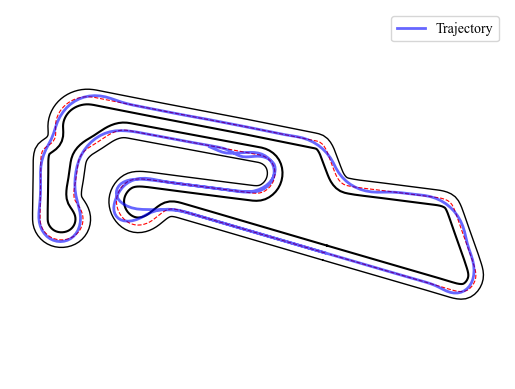

In [53]:
plt.figure()
plt.plot(state_history[0,:], state_history[1,:], 'b-', linewidth= 2, alpha =0.6, label = 'Trajectory')
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
plt.legend(prop={'size': 10})
plt.axis('equal')
plt.axis('off')
plt.show()

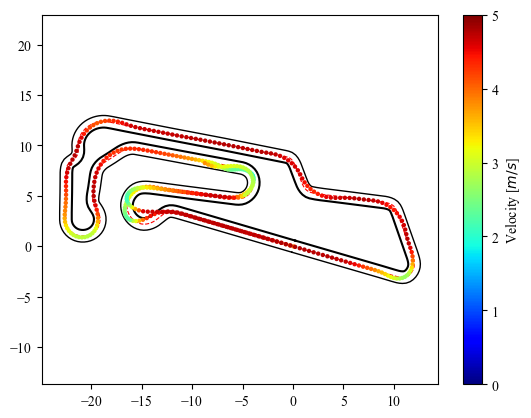

In [54]:
plt.figure()
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')

sc = plt.scatter(state_history[0, :-1], state_history[1,:-1], s = 10, 
                c=state_history[2,:-1], cmap=cm.jet, 
                vmin=0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label(r"Velocity [$m/s$]", size=10)
plt.axis('equal')
plt.show()

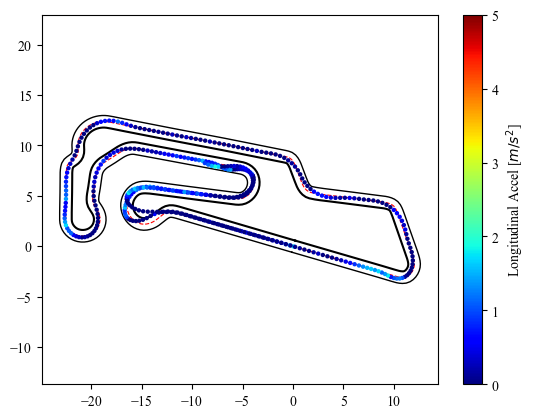

In [55]:
plt.figure()
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
sc = plt.scatter(state_history[0, :-1], state_history[1,:-1], s = 10, 
                c=control_history[0,:], cmap=cm.jet, 
                vmin=0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label(r"Longitudinal Accel [$m/s^2$]", size=10)
plt.axis('equal')
plt.show()

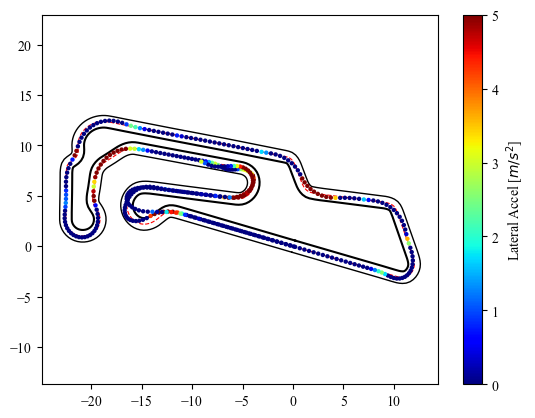

In [56]:
plt.figure()
ref_path.plot_track(linewidth = 1)
ref_path.plot_track_center(linewidth = 0.8, c='r')
alat = state_history[2,:]**2*np.tan(state_history[-1,:])/0.257
sc = plt.scatter(state_history[0, ], state_history[1,], s = 10, 
                c=alat, cmap=cm.jet, 
                vmin = 0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(sc)
cbar.set_label(r"Lateral Accel [$m/s^2$]", size=10)
plt.axis('equal')
plt.show()

In [57]:
sim = plt.figure()
ref_path.plot_track()
plan_plot = plt.plot([], [], linewidth= 2)[0]
traj_plot = plt.scatter([], [], s = 10, c=[], cmap=cm.jet, vmin=0, vmax=5, edgecolor='none', marker='o')
cbar = plt.colorbar(traj_plot)
cbar.set_label(r"velocity [$m/s$]", size=20)
plt.axis('equal')
plt.close()

def drawframe(n):
    traj_plot.set_offsets(state_history[:2,:n+1].T)
    traj_plot.set_array(state_history[2,:n+1])
    plan_plot.set_data(plan_history[0,:, n], plan_history[1,:, n])
    
    return (traj_plot,plan_plot)


# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(sim, drawframe, frames=itr_receding, interval=ilqr.dt*1000, blit=True)
HTML(anim.to_html5_video())